# 1. Data Loading & Storage

- We use the published performance results of the SPEC CPU2017 public dataset, which are organised into 4 suites: `FP_rate`, `FP_speed`, `Int_rate`, and `Int_speed`
- There is a Jupyter notebook at `data/dl.ipynb` that explains how to obtain the data from <https://www.spec.org/cpu2017/results/cpu2017.html>

In [1]:
"""
Data: Last update: 2020-06-30t14:41
FP_rate:  5382 - FP_speed:  4328 
Int_rate: 5607 - Int_speed: 4333
"""
# %reload_ext autoreload
# %autoreload 2
%reset -f
import warnings
warnings.simplefilter(action="default")

import dill  # save the notebook session
import pandas as pd
from predict import data_load_clean
from termcolor import colored

pd.set_option("display.max_columns", None)  # show all columns when display
pd.set_option("display.max_rows", None)
VERBOSE = False

#####
# load data and store
suites = [
    {"name": "FP_rate", "benchmarks": {}},
    {"name": "FP_speed", "benchmarks": {}},
    {"name": "Int_rate", "benchmarks": {}},
    {"name": "Int_speed", "benchmarks": {}},
]

for suite in suites:
    if suite["name"] == "FP_rate":
        suite["benchmarks"] = [
            "503.bwaves_r",
            "507.cactuBSSN_r",
            "508.namd_r",
            "510.parest_r",
            "511.povray_r",
            "519.lbm_r",
            "521.wrf_r",
            "526.blender_r",
            "527.cam4_r",
            "538.imagick_r",
            "544.nab_r",
            "549.fotonik3d_r",
            "554.roms_r",
        ]

    elif suite["name"] == "FP_speed":
        suite["benchmarks"] = [
            "603.bwaves_s",
            "607.cactuBSSN_s",
            "619.lbm_s",
            "621.wrf_s",
            "627.cam4_s",
            "628.pop2_s",
            "638.imagick_s",
            "644.nab_s",
            "649.fotonik3d_s",
            "654.roms_s",
        ]

    elif suite["name"] == "Int_rate":
        suite["benchmarks"] = [
            "500.perlbench_r",
            "502.gcc_r",
            "505.mcf_r",
            "520.omnetpp_r",
            "523.xalancbmk_r",
            "525.x264_r",
            "531.deepsjeng_r",
            "541.leela_r",
            "548.exchange2_r",
            "557.xz_r",
        ]

    elif suite["name"] == "Int_speed":
        suite["benchmarks"] = [
            "600.perlbench_s",
            "602.gcc_s",
            "605.mcf_s",
            "620.omnetpp_s",
            "623.xalancbmk_s",
            "625.x264_s",
            "631.deepsjeng_s",
            "641.leela_s",
            "648.exchange2_s",
            "657.xz_s",
        ]

df_read = {}
for suite in suites:
    cat = suite["name"]
    # DATA_RECORD will be manipulated and suite's benchmarks will be added to it
    # TODO: we read 'storage_type' too, but since its format is complicated,
    # we ignore it, so no key for that here
    DATA_RECORD = {
        "vendor": "",
        "hardware_vendor": "",
        "model_name": "",
        "test_sponsor": "",
        "nominal_mhz": "",
        "max_mhz": "",
        "arch": "",
        "cpus": "",
        "threads_per_core": "",
        "cores_per_socket": "",
        "sockets": "",
        "numas": "",
        "l1d_cache_kb": "",
        "l1i_cache_kb": "",
        "l2_cache_kb": "",
        "l3_cache_kb": "",
        "mem_kb": "",
        "mem_channels": "",
        "channel_kb": "",
        "mem_data_rate": "",
        "storage_gb": "",
        "os_name": "",
        "os_vid": "",
        "os": "",
        "compiler": "",
        "parallel": "",
        "file_system": "",
        "threads_or_copies": "",
        "file": "",
    }

    data_load_clean.write_cvs_to_inputs(suite, DATA_RECORD)

    df_read[cat] = pd.read_csv("data/in/input_" + cat + ".csv")

    if not df_read[cat]["max_mhz"].dtype == "float64":
        raise TypeError("`max_mhz` column dtype is not a float64!")

    print(colored("\n***** " + cat + " *****", "magenta", attrs=["bold"]))
    print(colored("*** Explore Data ***", "green"))
    print(colored("df_read shape:", "red"), df_read[cat].shape)
    display(df_read[cat].head(5))

    if VERBOSE:
        # print(colored("*** Info df_read: ***", 'green'))
        # display(df_read[cat].info())
        print(colored("*** Describe df_read: ***", "green"))
        display(df_read[cat].describe())

#####
# save the notebook session
dill.dump_session("pickles/regress_01_load.pkl")




***** FP_rate *****
*** Explore Data ***
df_read shape: (5331, 55)


,vendor,hardware_vendor,model_name,test_sponsor,nominal_mhz,max_mhz,arch,cpus,threads_per_core,cores_per_socket,sockets,numas,l1d_cache_kb,l1i_cache_kb,l2_cache_kb,l3_cache_kb,mem_kb,mem_channels,channel_kb,mem_data_rate,storage_gb,os_name,os_vid,os,compiler,parallel,file_system,threads_or_copies,file,503.bwaves_r,t_503.bwaves_r,507.cactuBSSN_r,t_507.cactuBSSN_r,508.namd_r,t_508.namd_r,510.parest_r,t_510.parest_r,511.povray_r,t_511.povray_r,519.lbm_r,t_519.lbm_r,521.wrf_r,t_521.wrf_r,526.blender_r,t_526.blender_r,527.cam4_r,t_527.cam4_r,538.imagick_r,t_538.imagick_r,544.nab_r,t_544.nab_r,549.fotonik3d_r,t_549.fotonik3d_r,554.roms_r,t_554.roms_r
0,Intel,Lenovo Global Technology,Xeon Gold 5220S,Lenovo Global Technology,2700,3900.0,x86_64,72.0,2.0,18.0,2.0,4.0,32,32,1024.0,25344.0,197684344,12.0,16777216.0,2933.0,960.0,SLES,12.4,SUSE Linux Enterprise Server 12 SP4 (x86_64),C/C++: Version 19.0.1.144 of Intel C/C++,No,xfs,72,cpu2017-20190902-17567.csv,449.875440,1604.924312,153.037656,595.618113,146.925216,465.543070,109.334232,1722.717455,216.601848,776.170721,105.904440,716.570742,194.933376,827.359726,198.994248,551.051050,219.847176,572.797826,446.692824,400.866107,317.911032,381.163262,142.466832,1969.469325,87.404904,1308.942075
1,Intel,Lenovo Global Technology,Xeon Gold 6226,Lenovo Global Technology,2700,3700.0,x86_64,48.0,2.0,12.0,2.0,4.0,32,32,1024.0,19712.0,395880772,12.0,33554432.0,2933.0,480.0,SLES,12.4,SUSE Linux Enterprise Server 12 SP4 (x86_64),C/C++: Version 19.0.0.117 of Intel,No,xfs,48,cpu2017-20190916-18068.csv,463.383120,1038.760363,128.608896,472.502250,117.596832,387.765533,109.155936,1150.354541,183.228960,611.693693,98.739888,512.376529,188.396976,570.709859,174.780768,418.261096,178.213296,471.075946,376.348032,317.195759,275.121840,293.629919,142.764576,1310.240798,86.132160,885.522735
2,Intel,Dell Inc.,Celeron G4900,Dell Inc.,3100,3100.0,x86_64,2.0,1.0,2.0,1.0,1.0,32,32,256.0,2048.0,65821136,4.0,16777216.0,2666.0,960.0,SLES,12.3,SUSE Linux Enterprise Server 12 SP3,C/C++: Version 18.0.0.128 of Intel C/C++,No,xfs,2,cpu2017-20190401-11590.csv,56.092792,357.550402,9.067756,279.231157,6.314918,300.874863,9.957300,525.443637,12.514456,373.168436,11.494936,183.385091,12.736198,351.753342,9.530868,319.593128,10.381122,336.957791,11.067356,449.429854,10.369284,324.612567,12.580956,619.507816,8.191630,387.956992
3,Intel,NEC Corporation,Xeon Bronze 3104,NEC Corporation,1700,1700.0,x86_64,12.0,1.0,6.0,2.0,2.0,32,32,1024.0,8448.0,395932708,24.0,16777216.0,2666.0,1024.0,RHEL,7.4,Red Hat Enterprise Linux Server release 7.4,C/C++: Version 18.0.2.199 of Intel C/C++,No,ext4,12,cpu2017-20181112-09517.csv,206.625576,582.386752,34.299576,442.920904,26.039676,437.793530,32.215512,974.437423,42.520824,658.971189,47.833080,264.419486,40.605720,661.975738,36.672972,498.350688,27.813000,754.611073,88.620324,336.762485,51.109692,395.150080,72.951684,641.027028,35.132556,542.744468
4,Intel,Lenovo Global Technology,Xeon Gold 6238L,Lenovo Global Technology,2100,3700.0,x86_64,88.0,2.0,22.0,2.0,4.0,32,32,1024.0,30976.0,395871888,24.0,16777216.0,2933.0,960.0,SLES,15.0,SUSE Linux Enterprise Server 15 (x86_64),C/C++: Version 19.0.4.227 of Intel,No,xfs,88,cpu2017-20190917-18267.csv,524.331104,1683.028201,193.741944,575.032946,172.083560,485.810518,122.705440,1876.102990,264.206272,777.725551,122.935208,754.478468,218.011376,904.173075,259.591464,516.288147,256.678488,599.629507,548.290424,399.160696,394.206032,375.702032,169.134768,2027.590133,97.829248,1429.347221



***** FP_speed *****
*** Explore Data ***
df_read shape: (4306, 49)


,vendor,hardware_vendor,model_name,test_sponsor,nominal_mhz,max_mhz,arch,cpus,threads_per_core,cores_per_socket,sockets,numas,l1d_cache_kb,l1i_cache_kb,l2_cache_kb,l3_cache_kb,mem_kb,mem_channels,channel_kb,mem_data_rate,storage_gb,os_name,os_vid,os,compiler,parallel,file_system,threads_or_copies,file,603.bwaves_s,t_603.bwaves_s,607.cactuBSSN_s,t_607.cactuBSSN_s,619.lbm_s,t_619.lbm_s,621.wrf_s,t_621.wrf_s,627.cam4_s,t_627.cam4_s,628.pop2_s,t_628.pop2_s,638.imagick_s,t_638.imagick_s,644.nab_s,t_644.nab_s,649.fotonik3d_s,t_649.fotonik3d_s,654.roms_s,t_654.roms_s
0,Intel,Hewlett Packard Enterprise,Xeon Gold 5215,HPE,2500,3400.0,x86_64,20.0,1.0,10.0,2.0,2.0,32,32,1024.0,14080.0,395628868,24.0,16777216.0,2666.0,960.0,SLES,15.0,SUSE Linux Enterprise Server 15 (x86_64),C/C++: Version 19.0.2.187 of Intel C/C++,Yes,xfs,20,cpu2017-20190513-13923.csv,356.915201,165.299768,90.498117,184.202727,68.912371,76.009575,70.552922,187.462115,58.967779,150.302422,58.690329,202.299088,65.288051,220.959270,122.059531,143.143267,63.046811,144.590978,69.585613,226.268036
1,Intel,Cisco Systems,Xeon Platinum 8153,Cisco Systems,2000,2800.0,x86_64,64.0,1.0,16.0,4.0,4.0,32,32,1024.0,22528.0,1583915932,48.0,33554432.0,2666.0,1024.0,SLES,12.2,SUSE Linux Enterprise Server 12 SP2 (x86_64),C/C++: Version 18.0.2.199 of Intel C/C++,Yes,xfs,64,cpu2017-20181127-09991.csv,850.614464,69.359272,172.443305,96.669453,76.505262,68.465879,66.792520,198.016185,96.871637,91.492208,36.876471,321.966821,135.978655,106.090180,244.369823,71.498190,101.406507,89.895612,232.554523,67.704553
2,Intel,Huawei,Xeon Platinum 8276L,Huawei,2200,4000.0,x86_64,56.0,1.0,28.0,2.0,2.0,32,32,1024.0,39424.0,394423724,24.0,16777216.0,2933.0,1200.0,SLES,12.4,SUSE Linux Enterprise Server 12 SP4 (x86_64),C/C++: Version 19.0.1.144 of Intel C/C++,Yes,xfs,56,cpu2017-20190415-12032.csv,506.391104,116.506786,172.437956,96.672452,103.245386,50.733502,121.132847,109.185909,115.147850,76.970608,55.097294,215.491525,154.306341,93.489353,280.223694,62.350188,89.426987,101.937908,155.118845,101.502819
3,Intel,Hewlett Packard Enterprise,Xeon Silver 4216,HPE,2100,3200.0,x86_64,32.0,1.0,16.0,2.0,2.0,32,32,1024.0,22528.0,395626568,24.0,16777216.0,2933.0,400.0,SLES,15.0,SUSE Linux Enterprise Server 15 (x86_64),C/C++: Version 19.0.2.187 of Intel C/C++,Yes,xfs,32,cpu2017-20190723-16342.csv,434.776479,135.697313,124.902194,133.464429,85.635856,61.165968,108.801633,121.560676,71.850694,123.353018,63.164569,187.969302,83.413782,172.945041,168.646860,103.601099,71.076180,128.256753,137.928135,114.153650
4,AMD,Dell Inc.,EPYC 7452,Dell Inc.,2350,3350.0,x86_64,128.0,2.0,32.0,2.0,16.0,32,32,512.0,131072.0,527961860,16.0,33554432.0,3200.0,960.0,SLES,15.1,SUSE Linux Enterprise Server 15 SP1,C/C++/Fortran: Version 2.0.0 of AOCC,Yes,xfs,64,cpu2017-20190930-18851.csv,565.308490,104.364256,230.071442,72.455755,52.500912,99.769695,125.659928,105.252328,103.495128,85.636881,56.584994,209.825947,222.463808,64.846503,309.149919,56.516269,83.347724,109.373112,217.586549,72.362010



***** Int_rate *****
*** Explore Data ***
df_read shape: (5553, 49)


,vendor,hardware_vendor,model_name,test_sponsor,nominal_mhz,max_mhz,arch,cpus,threads_per_core,cores_per_socket,sockets,numas,l1d_cache_kb,l1i_cache_kb,l2_cache_kb,l3_cache_kb,mem_kb,mem_channels,channel_kb,mem_data_rate,storage_gb,os_name,os_vid,os,compiler,parallel,file_system,threads_or_copies,file,500.perlbench_r,t_500.perlbench_r,502.gcc_r,t_502.gcc_r,505.mcf_r,t_505.mcf_r,520.omnetpp_r,t_520.omnetpp_r,523.xalancbmk_r,t_523.xalancbmk_r,525.x264_r,t_525.x264_r,531.deepsjeng_r,t_531.deepsjeng_r,541.leela_r,t_541.leela_r,548.exchange2_r,t_548.exchange2_r,557.xz_r,t_557.xz_r
0,Intel,Huawei,Xeon Platinum 8260L,Huawei,2400,3900.0,x86_64,96.0,2.0,24.0,2.0,4.0,32,32,1024.0,36608.0,394416876,24.0,16777216.0,2933.0,1200.0,SLES,12.40,SUSE Linux Enterprise Server 12 SP4 (x86_64),C/C++: Version 19.0.1.144 of Intel C/C++,No,xfs,96,cpu2017-20190428-12621.csv,212.332992,719.775050,224.854272,604.551639,358.965504,432.175225,179.575200,701.388541,300.203616,337.690841,559.236384,300.581295,232.338816,473.515368,223.910208,709.998947,493.486752,509.679367,185.956800,557.548879
1,Intel,ASUSTeK Computer Inc.,Xeon E-2124,ASUSTeK Computer Inc.,3300,4300.0,x86_64,4.0,1.0,4.0,1.0,1.0,32,32,256.0,8192.0,65867300,4.0,16777216.0,2666.0,500.0,SLES,15.00,SUSE Linux Enterprise Server 15,C/C++: Version 19.0.4.227 of Intel C/C++,No,xfs,4,cpu2017-20190728-16439.csv,22.005492,289.382308,26.251452,215.759500,32.858816,196.720421,17.897844,293.219664,32.485452,130.027434,58.890288,118.933021,21.703268,211.212430,18.217060,363.615206,60.380424,173.566182,14.715896,293.560102
2,Intel,NEC Corporation,Xeon Gold 6142,NEC Corporation,2600,3700.0,x86_64,32.0,2.0,16.0,1.0,2.0,32,32,1024.0,22528.0,196476032,6.0,33554432.0,2666.0,1024.0,RHEL,7.40,Red Hat Enterprise Linux Server release 7.4,C/C++: Version 18.0.0.128 of Intel C/C++,No,ext4,32,cpu2017-20180903-08760.csv,71.331072,714.190852,77.513888,584.566113,112.895456,458.052044,55.267808,759.646745,91.517568,369.240600,188.527808,297.208124,81.038176,452.527489,76.175424,695.657487,181.582880,461.717571,61.366976,563.169441
3,Intel,Dell Inc.,Pentium Gold G5500,Dell Inc.,3800,3800.0,x86_64,4.0,2.0,2.0,1.0,1.0,32,32,256.0,4096.0,65820840,4.0,16777216.0,2666.0,960.0,SLES,12.30,SUSE Linux Enterprise Server 12 SP3,C/C++: Version 18.0.0.128 of Intel C/C++,No,xfs,4,cpu2017-20190401-11595.csv,11.434076,556.931693,14.335672,395.098326,15.151888,426.613554,8.703176,602.998139,15.087268,279.971146,18.859400,371.379784,12.144768,377.446486,10.638748,622.629721,16.518036,634.457928,8.497844,508.364321
4,Intel,Dell Inc.,Xeon Gold 6230,Dell Inc.,2100,3900.0,x86_64,80.0,2.0,20.0,2.0,4.0,32,32,1024.0,28160.0,394664916,12.0,33554432.0,2933.0,480.0,Ubuntu,18.04,Ubuntu 18.04.2 LTS,C/C++: Version 19.0.4.227 of Intel,No,ext4,80,cpu2017-20190708-15967.csv,165.892880,767.724287,177.960480,636.545872,282.340880,457.886173,142.531360,736.399263,243.857360,346.431985,434.152960,322.651256,180.563120,507.744867,173.130720,765.202225,443.102880,473.027852,144.608080,597.476908



***** Int_speed *****
*** Explore Data ***
df_read shape: (4313, 49)


,vendor,hardware_vendor,model_name,test_sponsor,nominal_mhz,max_mhz,arch,cpus,threads_per_core,cores_per_socket,sockets,numas,l1d_cache_kb,l1i_cache_kb,l2_cache_kb,l3_cache_kb,mem_kb,mem_channels,channel_kb,mem_data_rate,storage_gb,os_name,os_vid,os,compiler,parallel,file_system,threads_or_copies,file,600.perlbench_s,t_600.perlbench_s,602.gcc_s,t_602.gcc_s,605.mcf_s,t_605.mcf_s,620.omnetpp_s,t_620.omnetpp_s,623.xalancbmk_s,t_623.xalancbmk_s,625.x264_s,t_625.x264_s,631.deepsjeng_s,t_631.deepsjeng_s,641.leela_s,t_641.leela_s,648.exchange2_s,t_648.exchange2_s,657.xz_s,t_657.xz_s
0,Intel,Dell Inc.,Xeon Gold 6142,Dell Inc.,2600,3700.0,x86_64,64.0,2.0,16.0,2.0,2.0,32,32,1024.0,22528.0,196690028,12.0,16777216.0,2666.0,480.0,CentOS,7.0,CentOS Linux release 7.4.1708 (Core),C/C++: Version 18.0.0.128 of Intel C/C++,Yes,xfs,64,cpu2017-20180122-02797.csv,6.142009,288.993404,9.153443,435.027554,10.774145,438.178636,5.818907,280.293198,9.423348,150.371179,11.606773,151.980226,5.037895,284.444181,4.317659,395.121495,13.303180,220.999789,22.648186,272.957846
1,AMD,ASUSTeK Computer Inc.,EPYC 7F72,ASUSTeK Computer Inc.,3200,3700.0,x86_64,48.0,2.0,24.0,1.0,2.0,32,32,512.0,196608.0,528195408,8.0,67108864.0,3200.0,240.0,SLES,15.1,SUSE Linux Enterprise Server 15 SP1 (x86_64),C/C++/Fortran: Version 2.0.0 of AOCC,Yes,xfs,24,cpu2017-20200316-21239.csv,5.071099,350.022727,10.378090,383.692949,16.587158,284.617772,5.180852,314.813071,10.504740,134.891491,14.010362,125.906809,5.326267,269.043954,4.721932,361.292819,17.889442,164.342741,22.580454,273.776601
2,Intel,Huawei,Xeon Gold 6254,Huawei,3100,4000.0,x86_64,36.0,1.0,18.0,2.0,2.0,32,32,1024.0,25344.0,394428348,24.0,16777216.0,2933.0,1200.0,SLES,12.4,SUSE Linux Enterprise Server 12 SP4 (x86_64),C/C++: Version 19.0.1.144 of Intel C/C++,Yes,xfs,36,cpu2017-20190425-12253.csv,6.937710,255.848112,10.006691,397.933744,12.868998,366.850642,7.941341,205.380924,12.732697,111.288283,14.515845,121.522380,5.597957,255.986237,4.900143,348.153137,14.453842,203.406129,23.482178,263.263483
3,Intel,Huawei,Xeon Platinum 8153,Huawei,2000,2800.0,x86_64,32.0,1.0,16.0,2.0,2.0,32,32,1024.0,22528.0,394174888,12.0,33554432.0,2666.0,2000.0,RHEL,7.4,Red Hat Enterprise Linux Server release 7.4,C/C++: Version 18.0.0.128 of Intel C/C++,Yes,xfs,32,cpu2017-20180810-08309.csv,4.765023,372.506069,7.725577,515.430764,9.356976,504.543367,5.261041,310.014707,7.446372,190.294007,8.767885,201.188760,4.083846,350.894681,3.264877,522.531239,10.182631,288.726938,18.124597,341.083451
4,Intel,Lenovo Global Technology,Xeon Gold 6242,Lenovo Global Technology,2800,3900.0,x86_64,64.0,2.0,16.0,2.0,2.0,32,32,1024.0,22528.0,395878324,12.0,33554432.0,2933.0,960.0,SLES,12.4,SUSE Linux Enterprise Server 12 SP4 (x86_64),C/C++: Version 19.0.4.227 of Intel,Yes,xfs,64,cpu2017-20190624-15486.csv,6.814707,260.466066,9.752079,408.323186,12.454283,379.066385,7.261190,224.618821,12.409210,114.189378,14.181946,124.383496,5.443460,263.251685,4.745522,359.496805,16.609088,177.011521,23.673420,261.136752


# 2.  Data Cleaning

## 2.1 Check Data

- Check Duplicates and NaNs

## 2.2 Clean Data

- Remove NaNs; there are no duplicates


In [2]:
%reset -f

#####
# restore the notebook session
import dill

dill.load_session("pickles/regress_01_load.pkl")
warnings.simplefilter(action="default")

import numpy as np

NO_OUTLIERS = False

#####
# check data
# do all these steps before we split the dataset,
# to aovid facing new categories on the test data

all_data_df = {}  # wide and non-NaN

for suite in suites:
    cat = suite["name"]
    print(colored("\n***** " + cat + " *****", "magenta", attrs=["bold"]))
    print("len of df_read_" + cat + ": ", len(df_read[cat]))
    check_df_read = pd.DataFrame(
        columns=[
            "arch",
            "cpus",
            "threads_per_core",
            "cores_per_socket",
            "sockets",
            "numas",
            "l1d_cache_kb",
            "l1i_cache_kb",
            "l2_cache_kb",
            "l3_cache_kb",
            "os_name",
            "os_vid",
            "os",
            "threads_or_copies",
            "file",
        ]
    )
    # Tip: cound and show rows with NaN values
    print("No of df_read['cpus'] = NaN: ", df_read[cat]["cpus"].isna().sum())
    print(
        "No of df_read['threads_per_core'] = NaN: ",
        df_read[cat]["threads_per_core"].isna().sum(),
    )
    print(
        "No of df_read['cores_per_socket'] = NaN: ",
        df_read[cat]["cores_per_socket"].isna().sum(),
    )
    print("No of df_read['numas'] = NaN: ", df_read[cat]["numas"].isna().sum())
    print("No of df_read['sockets'] = NaN: ", df_read[cat]["sockets"].isna().sum())
    print(
        "No of df_read['l1d_cache_kb'] = NaN: ",
        df_read[cat]["l1d_cache_kb"].isna().sum(),
    )
    print(
        "No of df_read['l1i_cache_kb'] = NaN: ",
        df_read[cat]["l1i_cache_kb"].isna().sum(),
    )
    print(
        "No of df_read['l2_cache_kb'] = NaN: ", df_read[cat]["l2_cache_kb"].isna().sum()
    )
    print(
        "No of df_read['l3_cache_kb'] = NaN: ", df_read[cat]["l3_cache_kb"].isna().sum()
    )
    print(
        "No of df_read['channel_kb'] = NaN: ", df_read[cat]["channel_kb"].isna().sum()
    )
    print("No of df_read['os_name'] = NaN: ", df_read[cat]["os_name"].isna().sum())
    print("No of df_read['os_vid'] = NaN: ", df_read[cat]["os_vid"].isna().sum())
    print("No of df_read['arch'] = NaN: ", df_read[cat]["arch"].isna().sum())
    # print(df_read[df_read['new_cpus'].isna()])

    for ind, val in df_read[cat].iterrows():
        ## new_sockets is moslty the same as chips
        # if val['sockets'] != val['chips']:
        ## cpus is mostly the same as threas_or_copies
        # if val['cpus'] != val['threads_or_copies']:
        # if val['arch'] != 'x86_64': # all non NaN are 'x86_64'

        # Tip: use pd.isna(). np.isnan() does not work for type `object`
        # if pd.isna(val['os_name']):
        if val["cpus"] != (
            val["threads_per_core"] * val["cores_per_socket"] * val["sockets"]
        ):
            check_df_read.loc[len(check_df_read)] = [
                val["arch"],
                val["cpus"],
                val["threads_per_core"],
                val["cores_per_socket"],
                val["sockets"],
                val["numas"],
                val["l1d_cache_kb"],
                val["l1i_cache_kb"],
                val["l2_cache_kb"],
                val["l3_cache_kb"],
                val["os_name"],
                val["os_vid"],
                val["os"],
                val["threads_or_copies"],
                val["file"],
            ]
    print(
        "\nNumber of instances that do not satisfy requirements: ",
        check_df_read.shape[0],
    )
    display(check_df_read.head())
    print("Duplicated Items: ", df_read[cat][df_read[cat].duplicated(keep=False)])

    ##########
    # clean data
    #####
    # remove Nans
    # Tip: proper deep copy of a DataFrame
    all_data_df[cat] = df_read[cat].copy()
    all_data_df[cat] = data_load_clean.remove_nan(
        all_data_df[cat], list(all_data_df[cat])
    )
    print(
        "No of total df_read['" + cat + "'] = NaN: ",
        df_read[cat].isna().sum().sum(),
        "No of total all_data_df ['" + cat + "'] = NaN: ",
        all_data_df[cat].isna().sum().sum(),
    )
    assert all_data_df[cat].isna().sum().sum() == 0  # sum of sum of NaNs in all columns

    ##########
    # TODO: we don't do this, only a few caes have this problem!
    # Remove rows that do not satisfy the interaction formulas
    #     expected_cpus = wide_df_read[cat]['sockets'] *  wide_df_read[cat]['cores_per_socket'] * \
    #         wide_df_read[cat]['threads_per_core']
    #     for ((ind,act),exp) in zip(zip(wide_df_read[cat]['cpus'].index, wide_df_read[cat]['cpus']),expected_cpus):
    #         if act != exp:
    #             print(act,exp,"cpus != sockets*cores/s*threads/c" )
    # #Tip: iloc gets the index starting from 0, loc gets the row with initial index
    #             #print(wide_df_read[cat].loc[ind])
    #             wide_df_read[cat] = wide_df_read[cat].drop(ind)

    #     # do the calculation again on the updated dataframe
    #     expected_cpus = wide_df_read[cat]['sockets'] *  wide_df_read[cat]['cores_per_socket'] * \
    #         wide_df_read[cat]['threads_per_core']
    #     assert expected_cpus.equals(wide_df_read[cat]['cpus']), "cpus != sockets*cores/s*threads/c"

    #     print(np.mean(wide_df_read[cat]['threads_or_copies']))
    #     wide_df_read[cat] = wide_df_read[cat][wide_df_read[cat]['threads_or_copies'] < 1000]
    #     print(np.mean(wide_df_read[cat]['threads_or_copies']))
    #####
    #     Note: mem_kb check is not possible, 1) available memory 2) approximation
    #     expected_mem_kb = wide_df_read[cat]['mem_channels'] *  wide_df_read[cat]['channel_kb']

    print(
        "shape of df_read: ",
        df_read[cat].shape,
        " vs shape of all_data_df after droping instances: ",
        all_data_df[cat].shape,
    )
    print("file systems: \n", all_data_df[cat]["file_system"].value_counts())
    print("arch: ", all_data_df[cat]["arch"].value_counts())
    print("parallel: ", all_data_df[cat]["parallel"].value_counts())

#####
# save the notebook session
dill.dump_session("pickles/regress_01_clean.pkl")



***** FP_rate *****
len of df_read_FP_rate:  5331
No of df_read['cpus'] = NaN:  8
No of df_read['threads_per_core'] = NaN:  8
No of df_read['cores_per_socket'] = NaN:  8
No of df_read['numas'] = NaN:  8
No of df_read['sockets'] = NaN:  8
No of df_read['l1d_cache_kb'] = NaN:  0
No of df_read['l1i_cache_kb'] = NaN:  0
No of df_read['l2_cache_kb'] = NaN:  0
No of df_read['l3_cache_kb'] = NaN:  0
No of df_read['channel_kb'] = NaN:  1
No of df_read['os_name'] = NaN:  0
No of df_read['os_vid'] = NaN:  0
No of df_read['arch'] = NaN:  8

Number of instances that do not satisfy requirements:  9


,arch,cpus,threads_per_core,cores_per_socket,sockets,numas,l1d_cache_kb,l1i_cache_kb,l2_cache_kb,l3_cache_kb,os_name,os_vid,os,threads_or_copies,file
0,NaN,NaN,NaN,NaN,NaN,NaN,32,32,256.0,8192.0,RHEL,7.2,Red Hat Enterprise Linux Server release 7.2,8,cpu2017-20161026-00028.csv
1,NaN,NaN,NaN,NaN,NaN,NaN,32,32,256.0,61440.0,SLES,12.1,SUSE Linux Enterprise Server 12 (x86_64) SP1,768,cpu2017-20161026-00018.csv
2,NaN,NaN,NaN,NaN,NaN,NaN,32,32,256.0,61440.0,SLES,12.1,SUSE Linux enterprise Server 12 SP1,192,cpu2017-20161026-00009.csv
3,NaN,NaN,NaN,NaN,NaN,NaN,32,32,256.0,56320.0,SLES,12.1,SUSE Linux Enterprise Server 12 (x86_64) SP1,88,cpu2017-20161026-00022.csv
4,NaN,NaN,NaN,NaN,NaN,NaN,32,32,256.0,56320.0,SLES,12.2,SUSE Linux Enterprise Server 12 SP2 RC2,88,cpu2017-20161026-00013.csv


Duplicated Items:  Empty DataFrame
Columns: [vendor, hardware_vendor, model_name, test_sponsor, nominal_mhz, max_mhz, arch, cpus, threads_per_core, cores_per_socket, sockets, numas, l1d_cache_kb, l1i_cache_kb, l2_cache_kb, l3_cache_kb, mem_kb, mem_channels, channel_kb, mem_data_rate, storage_gb, os_name, os_vid, os, compiler, parallel, file_system, threads_or_copies, file, 503.bwaves_r, t_503.bwaves_r, 507.cactuBSSN_r, t_507.cactuBSSN_r, 508.namd_r, t_508.namd_r, 510.parest_r, t_510.parest_r, 511.povray_r, t_511.povray_r, 519.lbm_r, t_519.lbm_r, 521.wrf_r, t_521.wrf_r, 526.blender_r, t_526.blender_r, 527.cam4_r, t_527.cam4_r, 538.imagick_r, t_538.imagick_r, 544.nab_r, t_544.nab_r, 549.fotonik3d_r, t_549.fotonik3d_r, 554.roms_r, t_554.roms_r]
Index: []
No of total df_read['FP_rate'] = NaN:  55 No of total all_data_df ['FP_rate'] = NaN:  0
shape of df_read:  (5331, 55)  vs shape of all_data_df after droping instances:  (5318, 55)
file systems: 
 xfs      3396
btrfs     973
ext4      680


,arch,cpus,threads_per_core,cores_per_socket,sockets,numas,l1d_cache_kb,l1i_cache_kb,l2_cache_kb,l3_cache_kb,os_name,os_vid,os,threads_or_copies,file
0,NaN,NaN,NaN,NaN,NaN,NaN,32,32,256.0,61440.0,SLES,12.1,SUSE Linux Enterprise Server 12 (x86_64) SP1,384,cpu2017-20161026-00017.csv
1,x86_64,18.0,1.0,6.0,2.0,2.0,32,32,1024.0,8448.0,SLES,15.0,SUSE Linux Enterprise Server 15,12,cpu2017-20190826-17234.csv
2,NaN,NaN,NaN,NaN,NaN,NaN,32,32,256.0,56320.0,SLES,12.1,SUSE Linux Enterprise Server 12 (x86_64) SP1,44,cpu2017-20161026-00024.csv


Duplicated Items:  Empty DataFrame
Columns: [vendor, hardware_vendor, model_name, test_sponsor, nominal_mhz, max_mhz, arch, cpus, threads_per_core, cores_per_socket, sockets, numas, l1d_cache_kb, l1i_cache_kb, l2_cache_kb, l3_cache_kb, mem_kb, mem_channels, channel_kb, mem_data_rate, storage_gb, os_name, os_vid, os, compiler, parallel, file_system, threads_or_copies, file, 603.bwaves_s, t_603.bwaves_s, 607.cactuBSSN_s, t_607.cactuBSSN_s, 619.lbm_s, t_619.lbm_s, 621.wrf_s, t_621.wrf_s, 627.cam4_s, t_627.cam4_s, 628.pop2_s, t_628.pop2_s, 638.imagick_s, t_638.imagick_s, 644.nab_s, t_644.nab_s, 649.fotonik3d_s, t_649.fotonik3d_s, 654.roms_s, t_654.roms_s]
Index: []
No of total df_read['FP_speed'] = NaN:  19 No of total all_data_df ['FP_speed'] = NaN:  0
shape of df_read:  (4306, 49)  vs shape of all_data_df after droping instances:  (4299, 49)
file systems: 
 xfs      2720
btrfs     937
ext4      455
tmpfs     187
Name: file_system, dtype: int64
arch:  x86_64    4299
Name: arch, dtype: int

,arch,cpus,threads_per_core,cores_per_socket,sockets,numas,l1d_cache_kb,l1i_cache_kb,l2_cache_kb,l3_cache_kb,os_name,os_vid,os,threads_or_copies,file
0,NaN,NaN,NaN,NaN,NaN,NaN,32,32,256.0,8192.0,RHEL,7.2,Red Hat Enterprise Linux Server release 7.2,8,cpu2017-20161026-00029.csv
1,x86_64,18.0,1.0,6.0,2.0,2.0,32,32,1024.0,8448.0,SLES,15.0,SUSE Linux Enterprise Server 15,12,cpu2017-20190826-17235.csv
2,NaN,NaN,NaN,NaN,NaN,NaN,32,32,256.0,56320.0,SLES,12.2,SUSE Linux Enterprise Server 12 SP2 RC2,88,cpu2017-20161026-00014.csv
3,NaN,NaN,NaN,NaN,NaN,NaN,32,32,256.0,61440.0,SLES,12.1,SUSE Linux Enterprise Server 12 (x86_64) SP1,768,cpu2017-20161026-00019.csv
4,NaN,NaN,NaN,NaN,NaN,NaN,32,32,256.0,51200.0,RHEL,7.2,Red Hat Enterprise Linux Server release 7.2,80,cpu2017-20161026-00026.csv


Duplicated Items:  Empty DataFrame
Columns: [vendor, hardware_vendor, model_name, test_sponsor, nominal_mhz, max_mhz, arch, cpus, threads_per_core, cores_per_socket, sockets, numas, l1d_cache_kb, l1i_cache_kb, l2_cache_kb, l3_cache_kb, mem_kb, mem_channels, channel_kb, mem_data_rate, storage_gb, os_name, os_vid, os, compiler, parallel, file_system, threads_or_copies, file, 500.perlbench_r, t_500.perlbench_r, 502.gcc_r, t_502.gcc_r, 505.mcf_r, t_505.mcf_r, 520.omnetpp_r, t_520.omnetpp_r, 523.xalancbmk_r, t_523.xalancbmk_r, 525.x264_r, t_525.x264_r, 531.deepsjeng_r, t_531.deepsjeng_r, 541.leela_r, t_541.leela_r, 548.exchange2_r, t_548.exchange2_r, 557.xz_r, t_557.xz_r]
Index: []
No of total df_read['Int_rate'] = NaN:  44 No of total all_data_df ['Int_rate'] = NaN:  0
shape of df_read:  (5553, 49)  vs shape of all_data_df after droping instances:  (5541, 49)
file systems: 
 xfs      3494
btrfs     987
ext4      710
tmpfs     350
Name: file_system, dtype: int64
arch:  x86_64    5541
Name: 

,arch,cpus,threads_per_core,cores_per_socket,sockets,numas,l1d_cache_kb,l1i_cache_kb,l2_cache_kb,l3_cache_kb,os_name,os_vid,os,threads_or_copies,file
0,x86_64,18.0,1.0,6.0,2.0,2.0,32,32,1024.0,8448.0,SLES,15.0,SUSE Linux Enterprise Server 15,12,cpu2017-20190826-17236.csv
1,NaN,NaN,NaN,NaN,NaN,NaN,32,32,256.0,56320.0,SLES,12.1,SUSE Linux Enterprise Server 12 (x86_64) SP1,44,cpu2017-20161026-00025.csv
2,NaN,NaN,NaN,NaN,NaN,NaN,32,32,256.0,61440.0,SLES,12.1,"SUSE Linux Enterprise Server 12 (x86_64) SP1,",96,cpu2017-20161026-00023.csv
3,NaN,NaN,NaN,NaN,NaN,NaN,32,32,256.0,61440.0,SLES,12.1,SUSE Linux Enterprise Server 12 (x86_64) SP1,384,cpu2017-20161026-00020.csv


Duplicated Items:  Empty DataFrame
Columns: [vendor, hardware_vendor, model_name, test_sponsor, nominal_mhz, max_mhz, arch, cpus, threads_per_core, cores_per_socket, sockets, numas, l1d_cache_kb, l1i_cache_kb, l2_cache_kb, l3_cache_kb, mem_kb, mem_channels, channel_kb, mem_data_rate, storage_gb, os_name, os_vid, os, compiler, parallel, file_system, threads_or_copies, file, 600.perlbench_s, t_600.perlbench_s, 602.gcc_s, t_602.gcc_s, 605.mcf_s, t_605.mcf_s, 620.omnetpp_s, t_620.omnetpp_s, 623.xalancbmk_s, t_623.xalancbmk_s, 625.x264_s, t_625.x264_s, 631.deepsjeng_s, t_631.deepsjeng_s, 641.leela_s, t_641.leela_s, 648.exchange2_s, t_648.exchange2_s, 657.xz_s, t_657.xz_s]
Index: []
No of total df_read['Int_speed'] = NaN:  25 No of total all_data_df ['Int_speed'] = NaN:  0
shape of df_read:  (4313, 49)  vs shape of all_data_df after droping instances:  (4305, 49)
file systems: 
 xfs      2687
btrfs    1036
ext4      451
tmpfs     131
Name: file_system, dtype: int64
arch:  x86_64    4305
Name

# 3. Data Splitting and Preprocessing Transformation

## 3.1 Splitting into Train and Test

- Steps such as **Normalization** should be done after splitting the data into train and test sets, using only the data from the train set.

## 3.2 Encoding Categorical Variables
- Dummy Variables (drop_first is enabled by default)
  - Naive: a naive approach as to use VID (Version ID) and 0 instead of 1 and 0 for dummy variables. That is equivalent of `y ~ catvar:vid`
  - **Nested Variables** (`NESTED_CATEGORICAL` in the code): this is basically creating dummy variables and then add the interaction, or `y ~ catvar + catvar:vid`

In [10]:
%reset -f

####
# restore the notebook session
import dill

dill.load_session("pickles/regress_01_clean.pkl")
warnings.simplefilter(action="default")

from predict import data_transform

pd.set_option("display.max_columns", None)  # show all columns when display
pd.set_option("display.max_rows", None)

RS = 42  # np.random
NESTED_CATEGORICAL = True  # Nested is the one that uses  `y ~ Name + Name:Version`. Weighted is the one that uses weighted dummy variables
TEST_SIZE = 0.2  # ,[0.3,0.4,0.5,0.6,0.7,0.8]

unique_oses = {}
unique_compilers = {}

print(
    colored(
        "OUTLIERS " + "Exist", "red", attrs=["bold"]  # if OUTLIERS else "DO NOT Exist""
    )
)

X_df, y_df, ty_df, Xy_df, sorted_X_df, sorted_y_df, sorted_ty_df, sorted_Xy_df = (
    {},
    {},
    {},
    {},
    {},
    {},
    {},
    {},
)
(
    train_X_df,
    train_y_df,
    train_ty_df,
    train_Xy_df,
    sorted_train_X_df,
    sorted_train_y_df,
    sorted_train_ty_df,
    sorted_train_Xy_df,
) = ({}, {}, {}, {}, {}, {}, {}, {})
(
    test_X_df,
    test_y_df,
    test_ty_df,
    test_Xy_df,
    sorted_test_X_df,
    sorted_test_y_df,
    sorted_test_ty_df,
    sorted_test_Xy_df,
) = ({}, {}, {}, {}, {}, {}, {}, {})

numerical_predictors = [
    "nominal_mhz",
    "max_mhz",
    "cpus",
    "threads_per_core",
    "cores_per_socket",
    "sockets",
    "numas",
    "l1d_cache_kb",
    "l1i_cache_kb",
    "l2_cache_kb",
    "l3_cache_kb",
    "mem_channels",
    "channel_kb",
    "mem_data_rate",
    "mem_kb",
    "threads_or_copies",
]  # ,'storage_gb'

# trans_numerical_predictors = ['nominal_mhz', 'max_mhz', 'log_cpus', 'threads_per_core', 'cores_per_socket',
#                               'sockets', 'numas', 'l1d_cache_kb', 'l1i_cache_kb', 'l2_cache_kb',
#                               'l3_cache_kb', 'mem_channels', 'channel_kb', 'mem_data_rate',
#                               'log_mem_kb', 'log_threads_or_copies'] #, 'log_storage_gb'

categorical_predictors = ["arch", "file_system", "parallel"]

#####
# Encoding Categorical Features
for suite in suites:
    cat = suite["name"]
    print(colored("\n***** " + cat + " *****", "magenta", attrs=["bold"]))

    unique_oses[cat] = data_transform.add_unique_os_columns(
        all_data_df[cat], NESTED_CATEGORICAL
    )
    unique_compilers[cat] = data_transform.add_unique_compiler_columns(
        all_data_df[cat], NESTED_CATEGORICAL
    )

    if VERBOSE:
        print("\nall_data_df['" + cat + "']:")
        display(all_data_df[cat].head(2))

    (
        X_df[cat],
        y_df[cat],
        ty_df[cat],
        Xy_df[cat],
        train_X_df[cat],
        train_y_df[cat],
        train_ty_df[cat],
        train_Xy_df[cat],
        test_X_df[cat],
        test_y_df[cat],
        test_ty_df[cat],
        test_Xy_df[cat],
    ) = data_transform.make_Xy_df(
        all_data_df[cat],
        NESTED_CATEGORICAL,
        numerical_predictors,
        categorical_predictors,
        unique_oses[cat],
        unique_compilers[cat],
        suite["benchmarks"],
        test_size=TEST_SIZE,
        # https://scikit-learn.org/stable/modules/cross_validation.html#a-note-on-shuffling
        shuffle=True,
        random_state=RS,
    )

    (
        sorted_X_df[cat],
        sorted_y_df[cat],
        sorted_ty_df[cat],
        sorted_Xy_df[cat],
        sorted_train_X_df[cat],
        sorted_train_y_df[cat],
        sorted_train_ty_df[cat],
        sorted_train_Xy_df[cat],
        sorted_test_X_df[cat],
        sorted_test_y_df[cat],
        sorted_test_ty_df[cat],
        sorted_test_Xy_df[cat],
    ) = data_transform.make_Xy_df(
        # pass the sorted df, sorted by date
        all_data_df[cat].sort_values(by=["file"]),
        NESTED_CATEGORICAL,
        numerical_predictors,
        categorical_predictors,
        unique_oses[cat],
        unique_compilers[cat],
        suite["benchmarks"],
        test_size=TEST_SIZE,
        # split without shuffling, i.e. based on date
        shuffle=False,
    )
    print("Sorted_Xy_df, head indexes:", sorted_Xy_df[cat].head().index)
    assert (
        all_data_df[cat]
        .sort_values(by=["file"])
        .head()
        .index.equals(sorted_train_Xy_df[cat].head().index)
    ), "Sorted train set does not start from the beginning of the sorted data"


    if VERBOSE:
        print("\nX_df, y_df")
        display(X_df[cat].head(2))
        display(y_df[cat].head(2))
    print("\nTrain_X_df, Train_y_df:")
    display(train_X_df[cat].head(2))
    display(train_y_df[cat].head(2))
    if VERBOSE:
        print("\nTest_X_df, Test_y_df:")
        display(test_X_df[cat].head(2))
        display(test_y_df[cat].head(2))
    print("Total features: ", len(list(train_X_df[cat])))
    print("Xy_df shape:", Xy_df[cat].shape)
    print(colored("train_Xy_df shape:", "red"), train_Xy_df[cat].shape)
    print(colored("test_Xy_df shape:", "red"), test_Xy_df[cat].shape)

#####
# save the notebook session
dill.dump_session("pickles/regress_01_split.pkl")


OUTLIERS Exist

***** FP_rate *****
Remove one OS dummy var:  OS_CentOS
unique_OS_dic:  {'OS_SLES': 1, 'OS_RHEL': 1, 'OS_Ubuntu': 1, 'OS_CentOS': 0}
Remove one Compiler dummy var:  COMP_AOCC
unique_Compiler_dic:  {'COMP_Intel': 1, 'COMP_AOCC': 0}
Sorted_Xy_df, head indexes: Int64Index([1044, 5264, 1032, 1829, 3940], dtype='int64')

Train_X_df, Train_y_df:


,nominal_mhz,max_mhz,cpus,threads_per_core,cores_per_socket,sockets,numas,l1d_cache_kb,l1i_cache_kb,l2_cache_kb,l3_cache_kb,mem_channels,channel_kb,mem_data_rate,mem_kb,threads_or_copies,OS_SLES,OS_RHEL,OS_Ubuntu,IA_OS_SLES,IA_OS_RHEL,IA_OS_Ubuntu,IA_OS_CentOS,COMP_Intel,IA_COMP_Intel,IA_COMP_AOCC,file_system_ext4,file_system_tmpfs,file_system_xfs
3853,2200,3200.0,112.0,2.0,14.0,4.0,8.0,32,32,1024.0,19712.0,48.0,33554432.0,2666.0,1584975680,112,1,0,0,12.2,0.0,0.0,0.0,1,1800.0,0.0,0,0,1
514,2100,3700.0,88.0,2.0,22.0,2.0,4.0,32,32,1024.0,30976.0,24.0,33554432.0,2933.0,791211720,88,1,0,0,15.0,0.0,0.0,0.0,1,1904.0,0.0,0,0,1


,503.bwaves_r,507.cactuBSSN_r,508.namd_r,510.parest_r,511.povray_r,519.lbm_r,521.wrf_r,526.blender_r,527.cam4_r,538.imagick_r,544.nab_r,549.fotonik3d_r,554.roms_r
3853,724.378592,231.846272,200.336752,149.720704,317.511600,179.688656,276.946880,281.543808,247.317728,408.791264,362.378352,244.990592,153.880272
514,524.800056,185.837080,180.863408,121.992464,265.490368,124.944072,224.112328,246.137144,265.863224,548.923056,393.735672,166.770208,100.954480


Total features:  29
Xy_df shape: (5318, 42)
train_Xy_df shape: (4254, 42)
test_Xy_df shape: (1064, 42)

***** FP_speed *****
Remove one OS dummy var:  OS_CentOS
unique_OS_dic:  {'OS_SLES': 1, 'OS_RHEL': 1, 'OS_CentOS': 0, 'OS_Ubuntu': 1}
Remove one Compiler dummy var:  COMP_AOCC
unique_Compiler_dic:  {'COMP_Intel': 1, 'COMP_AOCC': 0}
Sorted_Xy_df, head indexes: Int64Index([4282, 4291, 658, 2779, 1880], dtype='int64')

Train_X_df, Train_y_df:


,nominal_mhz,max_mhz,cpus,threads_per_core,cores_per_socket,sockets,numas,l1d_cache_kb,l1i_cache_kb,l2_cache_kb,l3_cache_kb,mem_channels,channel_kb,mem_data_rate,mem_kb,threads_or_copies,OS_SLES,OS_RHEL,OS_Ubuntu,IA_OS_SLES,IA_OS_RHEL,IA_OS_CentOS,IA_OS_Ubuntu,COMP_Intel,IA_COMP_Intel,IA_COMP_AOCC,file_system_ext4,file_system_tmpfs,file_system_xfs
2608,2200,4000.0,96.0,2.0,24.0,2.0,4.0,32,32,1024.0,36608.0,12.0,33554432.0,2933.0,394821904,96,0,1,0,0.0,8.1,0.0,0.0,1,1911.0,0.0,0,1,0
4007,3800,4700.0,12.0,2.0,6.0,1.0,1.0,32,32,256.0,12288.0,4.0,16777216.0,2666.0,65807636,6,0,1,0,0.0,7.5,0.0,0.0,1,1802.0,0.0,0,0,1


,603.bwaves_s,607.cactuBSSN_s,619.lbm_s,621.wrf_s,627.cam4_s,628.pop2_s,638.imagick_s,644.nab_s,649.fotonik3d_s,654.roms_s
2608,434.694703,151.260454,85.386664,114.824128,114.701964,59.576815,126.992611,257.155992,76.097713,129.207844
4007,78.854425,55.689602,7.047291,39.523858,24.125267,34.611290,30.281031,57.013467,17.319799,16.696369


Total features:  29
Xy_df shape: (4299, 39)
train_Xy_df shape: (3439, 39)
test_Xy_df shape: (860, 39)

***** Int_rate *****
Remove one OS dummy var:  OS_CentOS
unique_OS_dic:  {'OS_SLES': 1, 'OS_RHEL': 1, 'OS_Ubuntu': 1, 'OS_CentOS': 0}
Remove one Compiler dummy var:  COMP_AOCC
unique_Compiler_dic:  {'COMP_Intel': 1, 'COMP_AOCC': 0}
Sorted_Xy_df, head indexes: Int64Index([325, 2196, 1915, 1818, 4343], dtype='int64')

Train_X_df, Train_y_df:


,nominal_mhz,max_mhz,cpus,threads_per_core,cores_per_socket,sockets,numas,l1d_cache_kb,l1i_cache_kb,l2_cache_kb,l3_cache_kb,mem_channels,channel_kb,mem_data_rate,mem_kb,threads_or_copies,OS_SLES,OS_RHEL,OS_Ubuntu,IA_OS_SLES,IA_OS_RHEL,IA_OS_Ubuntu,IA_OS_CentOS,COMP_Intel,IA_COMP_Intel,IA_COMP_AOCC,file_system_ext4,file_system_tmpfs,file_system_xfs
2395,1800,3600.0,80.0,2.0,20.0,2.0,4.0,32,32,1024.0,28160.0,24.0,33554432.0,2933.0,792234908,80,1,0,0,15.0,0.0,0.0,0.0,1,1904.0,0.0,0,0,1
2567,2100,3700.0,176.0,2.0,22.0,4.0,8.0,32,32,1024.0,30976.0,48.0,16777216.0,2666.0,791092944,176,1,0,0,12.3,0.0,0.0,0.0,1,1802.0,0.0,0,0,1


,500.perlbench_r,502.gcc_r,505.mcf_r,520.omnetpp_r,523.xalancbmk_r,525.x264_r,531.deepsjeng_r,541.leela_r,548.exchange2_r,557.xz_r
2395,149.49112,166.302960,259.871360,137.212480,219.511680,394.455920,163.55160,147.609680,389.982000,134.684160
2567,335.57920,353.303632,506.605616,275.475728,397.314368,865.705984,375.01992,354.614128,826.373504,296.951952


Total features:  29
Xy_df shape: (5541, 39)
train_Xy_df shape: (4432, 39)
test_Xy_df shape: (1109, 39)

***** Int_speed *****
Remove one OS dummy var:  OS_CentOS
unique_OS_dic:  {'OS_CentOS': 0, 'OS_SLES': 1, 'OS_RHEL': 1, 'OS_Ubuntu': 1}
Remove one Compiler dummy var:  COMP_AOCC
unique_Compiler_dic:  {'COMP_Intel': 1, 'COMP_AOCC': 0}
Sorted_Xy_df, head indexes: Int64Index([2776, 4048, 1723, 3866, 3496], dtype='int64')

Train_X_df, Train_y_df:


,nominal_mhz,max_mhz,cpus,threads_per_core,cores_per_socket,sockets,numas,l1d_cache_kb,l1i_cache_kb,l2_cache_kb,l3_cache_kb,mem_channels,channel_kb,mem_data_rate,mem_kb,threads_or_copies,OS_SLES,OS_RHEL,OS_Ubuntu,IA_OS_CentOS,IA_OS_SLES,IA_OS_RHEL,IA_OS_Ubuntu,COMP_Intel,IA_COMP_Intel,IA_COMP_AOCC,file_system_ext4,file_system_tmpfs,file_system_xfs
1304,2000,3000.0,16.0,1.0,8.0,2.0,2.0,32,32,1024.0,11264.0,12.0,33554432.0,2666.0,395884172,16,1,0,0,0.0,12.2,0.0,0.0,1,1800.0,0.0,0,0,0
1125,2700,4000.0,104.0,2.0,26.0,2.0,2.0,32,32,1024.0,36608.0,24.0,16777216.0,2933.0,395869268,104,1,0,0,0.0,12.4,0.0,0.0,1,1901.0,0.0,0,0,0


,600.perlbench_s,602.gcc_s,605.mcf_s,620.omnetpp_s,623.xalancbmk_s,625.x264_s,631.deepsjeng_s,641.leela_s,648.exchange2_s,657.xz_s
1304,4.885614,7.219059,9.173543,4.102241,7.523701,9.391323,4.206654,3.512793,10.838981,15.528551
1125,6.930780,10.278196,12.770440,9.230786,12.798870,14.579334,5.554981,4.888279,14.393614,24.992648


Total features:  29
Xy_df shape: (4305, 39)
train_Xy_df shape: (3444, 39)
test_Xy_df shape: (861, 39)


# 4. Data Visualisation

## 4.1 Means and Standard Deviations of the benchmarks

- The large variations of the scores within and across the four suites indicate that the performance prediction is nontrivial

7088.049792 (5318,)
3327.9267839999998 (5318,)
3386.039552 (5318,)
1589.847552 (5318,)
5310.027520000001 (5318,)
1732.93632 (5318,)
2934.157824 (5318,)
4554.889472 (5318,)
3831.435776 (5318,)
7506.942464 (5318,)
6475.22176 (5318,)
2232.5713920000003 (5318,)
1257.848064 (5318,)
1222.2281699999999 (4299,)
324.007754 (4299,)
182.84157199999999 (4299,)
189.261636 (4299,)
201.128247 (4299,)
76.41173 (4299,)
401.04193100000003 (4299,)
702.978081 (4299,)
138.473468 (4299,)
959.9367689999999 (4299,)
3409.3265920000003 (5541,)
2941.37088 (5541,)
4590.229504 (5541,)
2151.4752 (5541,)
3197.827584 (5541,)
6872.905984 (5541,)
4009.67168 (5541,)
3772.0865280000003 (5541,)
8666.821632 (5541,)
3026.766848 (5541,)
8.562932 (4305,)
13.620239999999999 (4305,)
24.169623 (4305,)
11.835942 (4305,)
17.567231 (4305,)
20.791469 (4305,)
7.6303220000000005 (4305,)
6.129743 (4305,)
21.96964 (4305,)
27.488421000000002 (4305,)


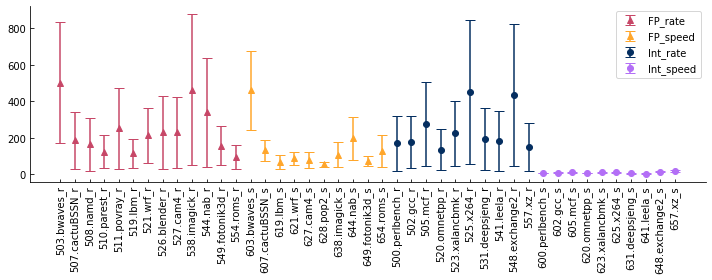

In [3]:
%reset -f
#####
# restore the notebook session
import dill
import matplotlib.pyplot as plt
import seaborn as sns

dill.load_session("pickles/regress_01_split.pkl")
warnings.simplefilter(action="default")

fig, ax = plt.subplots(figsize=(10,4))
perf_range_df = pd.DataFrame(columns=["benchmark", "mean", "std"])
for suite in suites:
    cat = suite["name"]
    # display(train_Xy_df[cat].head())
    for bench in suite['benchmarks']:
        # perf_range_df.loc[len(perf_range_df)] = [bench, train_Xy_df[cat][bench].mean(), train_Xy_df[cat][bench].std()]
        print(Xy_df[cat][bench].max(), Xy_df[cat][bench].shape)
        perf_range_df.loc[len(perf_range_df)] = [bench, Xy_df[cat][bench].mean(), Xy_df[cat][bench].std()]


colors = [
    "deep rose",
    "mango",
    "marine", 
    "light urple",  
]


for s, suite in enumerate(suites):
    cat = suite['name']
    suite_df = perf_range_df.loc[perf_range_df["benchmark"].isin(suite["benchmarks"])]
    (_, caps, _) = ax.errorbar(suite_df["benchmark"], suite_df["mean"], suite_df["std"], linestyle="None", marker="^" if "FP" in cat else "o", markersize=6, capsize=5, color=sns.xkcd_palette(colors)[s], label=cat)
    for cap in caps:
        cap.set_markeredgewidth(1)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.xticks(rotation='vertical')
plt.grid(False)
ax.tick_params(top=False, bottom=True, direction="in")
plt.legend()

fig.tight_layout()
# plt.savefig(
#     "plots/explore/mean_scores.pdf", bbox_inches="tight", dpi=300
# )
plt.show()
plt.close()


## 4.2 Correlation Heatmap

**Note**: The heatmaps and correlation data are presented for more information and are not included in the paper.

- We use the train data. Test data is kept aside

In [4]:
%reset -f

#####
# restore the notebook session
import dill

dill.load_session("pickles/regress_01_split.pkl")
warnings.simplefilter(action="default")

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

for suite in suites:
    cat = suite["name"]
    print(colored("\n***** " + cat + " *****", "magenta", attrs=["bold"]))

    ########################################
    # table
    rho = train_Xy_df[cat].corr().round(2)  # greek ρ (rho)
    # pval = calculate_pvalues(df) # p-values
    def kendall_pval(x, y):
        return stats.kendalltau(x, y)[1]

    def pearsonr_pval(x, y):
        return stats.pearsonr(x, y)[1]

    def spearmanr_pval(x, y):
        return stats.spearmanr(x, y)[1]

    pval = train_Xy_df[cat].corr(method=pearsonr_pval).round(2)
    # display(pval)
    # create three masks
    # one liner:
    # [rho.mask(pval<=p,rho.applymap(lambda x: '{}*'.format(x)),inplace=True) for p in [.1,.05,.01]]
    r1 = rho.applymap(lambda x: "{}*".format(x))
    r2 = rho.applymap(lambda x: "{}**".format(x))
    r3 = rho.applymap(lambda x: "{}***".format(x))

    rho = rho.mask(pval <= 0.1, r1)
    rho = rho.mask(pval <= 0.05, r2)
    rho = rho.mask(pval <= 0.01, r3)
    # rho = rho.mask(pval>0.05,np.NaN)

    print("Insignificant Correlations:")
    for r_ind, (row_label, row) in enumerate(pval.iterrows()):
        for c_ind, col_label in enumerate(pval.columns):
            if row[col_label] > 0.05 and col_label not in train_X_df[cat].columns:
                # print insignificant correlations with targets
                print(
                    f"{'pval: '}{row[col_label]:<5.2f}{'corr: '}"
                    f"{rho.iloc[r_ind,c_ind]:<7}{row_label:>15}{' - '}{col_label}"
                )

    display(rho)

    ########################################
    # heatmap
    print(
        "train_X columns: ",
        len(train_X_df[cat].columns),
        ", train_Xy_df columns: ",
        list(train_Xy_df[cat]),
    )
    # correlations Heatmap
    correlation_matrix = train_Xy_df[cat].corr().round(2)
    # generate a mask for the upper triangle
    mask = np.triu(np.ones_like(correlation_matrix, dtype=np.bool))
    f, ax = plt.subplots(figsize=(30, 20))
    sns.heatmap(correlation_matrix, mask=mask, cmap="RdYlGn", annot=True)
    plt.savefig("plots/explore/heatmap/" + cat + ".png", bbox_inches="tight", dpi=200)
    plt.close()

    spearmanr_matrix = stats.spearmanr(train_Xy_df[cat]).correlation
    mask = np.triu(np.ones_like(spearmanr_matrix, dtype=np.bool))
    f, ax = plt.subplots(figsize=(30, 20))
    sns.heatmap(spearmanr_matrix, mask=mask, cmap="RdYlGn", annot=True)
    plt.savefig(
        "plots/explore/heatmap/spearmanr_" + cat + ".png", bbox_inches="tight", dpi=200
    )
    plt.close()

#####
# save the notebook session
dill.dump_session("pickles/regress_01_heatmap.pkl")


/home/ashkan/Repos/spec17/venv/lib/python3.8/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/home/ashkan/Repos/spec17/venv/lib/python3.8/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())

***** FP_rate *****
Insignificant Correlations:
pval: 0.96 corr: 0.0          OS_Ubuntu - 503.bwaves_r
pval: 0.11 corr: 0.02         OS_Ubuntu - 507.cactuBSSN_r
pval: 0.65 corr: 0.01         OS_Ubuntu - 508.namd_r
pval: 0.15 corr: 0.02         OS_Ubuntu - 510.parest_r
pval: 0.75 corr: 0.0          OS_Ubuntu - 511.povray_r
pval: 0.95 corr: -0.0         OS_Ubuntu - 519.lbm_r
pval: 0.54 corr: 0.01         OS_Ubuntu - 521.wrf_r
pval: 0.32 corr: 0.02         OS_Ubuntu - 526.blender_r
pval: 0.22 corr: 0.02         OS_Ubuntu

,nominal_mhz,max_mhz,cpus,threads_per_core,cores_per_socket,sockets,numas,l1d_cache_kb,l1i_cache_kb,l2_cache_kb,l3_cache_kb,mem_channels,channel_kb,mem_data_rate,mem_kb,threads_or_copies,OS_SLES,OS_RHEL,OS_Ubuntu,IA_OS_SLES,IA_OS_RHEL,IA_OS_Ubuntu,IA_OS_CentOS,COMP_Intel,IA_COMP_Intel,IA_COMP_AOCC,file_system_ext4,file_system_tmpfs,file_system_xfs,503.bwaves_r,507.cactuBSSN_r,508.namd_r,510.parest_r,511.povray_r,519.lbm_r,521.wrf_r,526.blender_r,527.cam4_r,538.imagick_r,544.nab_r,549.fotonik3d_r,554.roms_r
nominal_mhz,1,0.59***,-0.27***,-0.04**,-0.43***,-0.09***,-0.08***,NaN,-0.13***,-0.4***,-0.08***,-0.09***,-0.14***,-0.03*,-0.08***,-0.27***,0.01,0.01,-0.03**,0.03*,0.02,-0.03*,-0.02,0.04***,0.05***,-0.01,0.02,-0.01,-0.02,-0.17***,-0.19***,-0.18***,-0.16***,-0.18***,-0.22***,-0.19***,-0.19***,-0.18***,-0.16***,-0.17***,-0.2***,-0.15***
max_mhz,0.59***,1,0.1***,0.18***,0.04***,0.03*,0.03*,NaN,-0.23***,-0.18***,-0.06***,0.03*,-0.19***,0.08***,0,0.12***,0.02,-0.02,-0.01,0.05***,-0.01,-0.01,0,0.24***,0.26***,-0.2***,-0.02,0.03**,-0.03**,0.1***,0.11***,0.16***,0.1***,0.16***,0.09***,0.13***,0.16***,0.19***,0.19***,0.2***,0.1***,0.11***
cpus,-0.27***,0.1***,1,0.21***,0.56***,0.81***,0.68***,NaN,-0.03**,0.2***,0.25***,0.74***,0.16***,0.12***,0.74***,0.99***,0.08***,-0.09***,0.01,0.08***,-0.09***,0.01,-0.02,-0.02,-0.02,0.04***,-0.05***,0.27***,-0.12***,0.89***,0.94***,0.97***,0.88***,0.97***,0.93***,0.93***,0.97***,0.96***,0.91***,0.96***,0.91***,0.89***
threads_per_core,-0.04**,0.18***,0.21***,1,0.15***,0.1***,0.18***,NaN,0.06***,0.28***,0.06***,0.1***,0.13***,0.1***,0.09***,0.21***,-0.02,-0.01,0.04**,-0.02,-0.01,0.04**,0.03**,-0.05***,-0.05***,0.03**,-0.02,-0.06***,0.02,0.17***,0.15***,0.14***,0.11***,0.14***,0.15***,0.16***,0.16***,0.15***,0.13***,0.16***,0.17***,0.13***
cores_per_socket,-0.43***,0.04***,0.56***,0.15***,1,0.11***,0.43***,NaN,0.11***,0.04***,0.72***,0.13***,0.32***,0.4***,0.17***,0.49***,0.05***,-0.09***,0.05***,0.08***,-0.09***,0.05***,0.01,-0.41***,-0.4***,0.44***,-0.07***,0.06***,0.02,0.35***,0.62***,0.56***,0.56***,0.55***,0.4***,0.48***,0.57***,0.55***,0.62***,0.55***,0.38***,0.42***
sockets,-0.09***,0.03*,0.81***,0.1***,0.11***,1,0.64***,NaN,-0.12***,0.34***,-0.08***,0.92***,0.04**,-0.05***,0.84***,0.83***,0.09***,-0.08***,-0.02,0.07***,-0.08***,-0.02,-0.03**,0.2***,0.19***,-0.19***,-0.05***,0.33***,-0.16***,0.93***,0.75***,0.81***,0.8***,0.82***,0.91***,0.88***,0.81***,0.82***,0.7***,0.79***,0.92***,0.9***
numas,-0.08***,0.03*,0.68***,0.18***,0.43***,0.64***,1,NaN,0.08***,0.08***,0.45***,0.59***,0.25***,0.22***,0.57***,0.64***,0.13***,-0.12***,-0.01,0.14***,-0.12***,-0,-0.07***,-0.28***,-0.28***,0.3***,-0.07***,0.26***,-0.08***,0.72***,0.75***,0.7***,0.81***,0.69***,0.71***,0.75***,0.7***,0.7***,0.69***,0.67***,0.72***,0.76***
l1d_cache_kb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
l1i_cache_kb,-0.13***,-0.23***,-0.03**,0.06***,0.11***,-0.12***,0.08***,NaN,1,-0.32***,0.13***,-0.12***,0.57***,-0.15***,0.05***,-0.03*,0.04***,-0.07***,0.06***,0.01,-0.07***,0.05***,-0.02,-0.6***,-0.6***,0.35***,0.02,-0.04***,0.06***,-0.04***,-0.03**,-0.05***,-0.04***,-0.08***,-0.04***,-0.06***,-0.05***,-0.08***,-0.1***,-0.09***,-0.05***,-0.07***
l2_cache_kb,-0.4***,-0.18***,0.2***,0.28***,0.04***,0.34***,0.08***,NaN,-0.32***,1,-0.32***,0.35***,-0.2***,0.02,0.18***,0.24***,-0.04**,0.02,0.01,-0.06***,0.01,0.01,0.04***,0.53***,0.53***,-0.51***,-0.06***,0.09***,-0.08***,0.34***,0.11***,0.19***,0.18***,0.21***,0.31***,0.27***,0.19***,0.23***,0.15***,0.23***,0.33***,0.3***


train_X columns:  29 , train_Xy_df columns:  ['nominal_mhz', 'max_mhz', 'cpus', 'threads_per_core', 'cores_per_socket', 'sockets', 'numas', 'l1d_cache_kb', 'l1i_cache_kb', 'l2_cache_kb', 'l3_cache_kb', 'mem_channels', 'channel_kb', 'mem_data_rate', 'mem_kb', 'threads_or_copies', 'OS_SLES', 'OS_RHEL', 'OS_Ubuntu', 'IA_OS_SLES', 'IA_OS_RHEL', 'IA_OS_Ubuntu', 'IA_OS_CentOS', 'COMP_Intel', 'IA_COMP_Intel', 'IA_COMP_AOCC', 'file_system_ext4', 'file_system_tmpfs', 'file_system_xfs', '503.bwaves_r', '507.cactuBSSN_r', '508.namd_r', '510.parest_r', '511.povray_r', '519.lbm_r', '521.wrf_r', '526.blender_r', '527.cam4_r', '538.imagick_r', '544.nab_r', '549.fotonik3d_r', '554.roms_r']
/home/ashkan/Repos/spec17/venv/lib/python3.8/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/ashkan/Repos/spec17/venv/lib/python3.8/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_div

,nominal_mhz,max_mhz,cpus,threads_per_core,cores_per_socket,sockets,numas,l1d_cache_kb,l1i_cache_kb,l2_cache_kb,l3_cache_kb,mem_channels,channel_kb,mem_data_rate,mem_kb,threads_or_copies,OS_SLES,OS_RHEL,OS_Ubuntu,IA_OS_SLES,IA_OS_RHEL,IA_OS_CentOS,IA_OS_Ubuntu,COMP_Intel,IA_COMP_Intel,IA_COMP_AOCC,file_system_ext4,file_system_tmpfs,file_system_xfs,603.bwaves_s,607.cactuBSSN_s,619.lbm_s,621.wrf_s,627.cam4_s,628.pop2_s,638.imagick_s,644.nab_s,649.fotonik3d_s,654.roms_s
nominal_mhz,1,0.58***,-0.33***,0.13***,-0.45***,-0.18***,-0.04**,NaN,-0,-0.5***,-0.06***,-0.17***,-0.1***,-0.06***,-0.14***,-0.37***,0.01,0,-0.01,0.02,0,-0.04***,-0,-0.06***,-0.05***,0.06***,0.07***,-0.01,0.02,-0.32***,-0.38***,-0.24***,-0.24***,-0.33***,-0.26***,-0.3***,-0.3***,-0.37***,-0.26***
max_mhz,0.58***,1,0.06***,0.12***,0.03**,-0.02,-0.07***,NaN,-0.02,-0.31***,-0.05***,-0.02,-0.12***,-0.01,-0.01,0.08***,0.01,-0.01,0.01,0.03**,-0.01,-0.03*,0.01,0.14***,0.16***,-0.14***,0,0.05***,-0.01,0.05***,0.13***,0.16***,0.22***,0.22***,0.14***,0.14***,0.19***,0.01,0.1***
cpus,-0.33***,0.06***,1,0.32***,0.72***,0.59***,0.5***,NaN,0.03,0.16***,0.43***,0.51***,0.26***,0.32***,0.54***,0.91***,-0.02,-0.04**,0.08***,0,-0.03*,0.05***,0.08***,-0.22***,-0.2***,0.22***,-0.07***,0.26***,-0.1***,0.69***,0.79***,0.56***,0.54***,0.79***,0.35***,0.86***,0.84***,0.62***,0.77***
threads_per_core,0.13***,0.12***,0.32***,1,0.06***,-0.13***,0.22***,NaN,0.05***,-0.27***,0.21***,-0.17***,0.05***,0.23***,-0.11***,0.08***,-0.18***,0.06***,0.12***,-0.17***,0.07***,0.25***,0.12***,-0.27***,-0.24***,0.28***,0.04***,0.19***,-0.01,-0.13***,-0.04**,-0.05***,0.04***,-0.04**,-0.05***,0,-0.03**,-0.15***,-0.04**
cores_per_socket,-0.45***,0.03**,0.72***,0.06***,1,0.15***,0.36***,NaN,0.02,0.11***,0.7***,0.17***,0.32***,0.43***,0.23***,0.68***,0.09***,-0.11***,0.03*,0.12***,-0.1***,-0.02,0.03*,-0.42***,-0.41***,0.42***,-0.1***,0.03**,0.01,0.46***,0.83***,0.36***,0.64***,0.68***,0.54***,0.81***,0.74***,0.48***,0.59***
sockets,-0.18***,-0.02,0.59***,-0.13***,0.15***,1,0.32***,NaN,-0.02,0.44***,-0.09***,0.88***,0.14***,-0.01,0.83***,0.71***,0.04**,-0.04**,0,0.03*,-0.04**,-0.02,0,0.2***,0.2***,-0.2***,-0.11***,0.23***,-0.13***,0.85***,0.55***,0.65***,0.34***,0.68***,0.15***,0.61***,0.68***,0.77***,0.7***
numas,-0.04**,-0.07***,0.5***,0.22***,0.36***,0.32***,1,NaN,0.05***,-0.08***,0.55***,0.26***,0.22***,0.35***,0.31***,0.4***,0.09***,-0.11***,0.04***,0.12***,-0.11***,-0.03*,0.04***,-0.48***,-0.48***,0.5***,-0.04**,0.09***,0,0.36***,0.37***,0.19***,0.2***,0.29***,0.09***,0.45***,0.38***,0.28***,0.43***
l1d_cache_kb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
l1i_cache_kb,-0,-0.02,0.03,0.05***,0.02,-0.02,0.05***,NaN,1,-0.06***,0.03,-0.02,0.09***,-0.03*,0.01,-0,0.01,-0.02,0.03*,0,-0.02,-0,0.03*,-0.13***,-0.13***,0.08***,0.02,-0.01,-0.03,-0,0.01,-0.02,0,0.01,-0.04**,-0.01,-0,-0.01,0.01
l2_cache_kb,-0.5***,-0.31***,0.16***,-0.27***,0.11***,0.44***,-0.08***,NaN,-0.06***,1,-0.3***,0.43***,-0.02,-0.03*,0.3***,0.27***,-0.08***,0.06***,0.04**,-0.11***,0.05***,0.06***,0.03**,0.45***,0.45***,-0.45***,-0.08***,0.08***,-0.1***,0.53***,0.32***,0.49***,0.4***,0.41***,0.53***,0.23***,0.33***,0.66***,0.3***


train_X columns:  29 , train_Xy_df columns:  ['nominal_mhz', 'max_mhz', 'cpus', 'threads_per_core', 'cores_per_socket', 'sockets', 'numas', 'l1d_cache_kb', 'l1i_cache_kb', 'l2_cache_kb', 'l3_cache_kb', 'mem_channels', 'channel_kb', 'mem_data_rate', 'mem_kb', 'threads_or_copies', 'OS_SLES', 'OS_RHEL', 'OS_Ubuntu', 'IA_OS_SLES', 'IA_OS_RHEL', 'IA_OS_CentOS', 'IA_OS_Ubuntu', 'COMP_Intel', 'IA_COMP_Intel', 'IA_COMP_AOCC', 'file_system_ext4', 'file_system_tmpfs', 'file_system_xfs', '603.bwaves_s', '607.cactuBSSN_s', '619.lbm_s', '621.wrf_s', '627.cam4_s', '628.pop2_s', '638.imagick_s', '644.nab_s', '649.fotonik3d_s', '654.roms_s']
/home/ashkan/Repos/spec17/venv/lib/python3.8/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/ashkan/Repos/spec17/venv/lib/python3.8/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/ashkan/Repos/spe

,nominal_mhz,max_mhz,cpus,threads_per_core,cores_per_socket,sockets,numas,l1d_cache_kb,l1i_cache_kb,l2_cache_kb,l3_cache_kb,mem_channels,channel_kb,mem_data_rate,mem_kb,threads_or_copies,OS_SLES,OS_RHEL,OS_Ubuntu,IA_OS_SLES,IA_OS_RHEL,IA_OS_Ubuntu,IA_OS_CentOS,COMP_Intel,IA_COMP_Intel,IA_COMP_AOCC,file_system_ext4,file_system_tmpfs,file_system_xfs,500.perlbench_r,502.gcc_r,505.mcf_r,520.omnetpp_r,523.xalancbmk_r,525.x264_r,531.deepsjeng_r,541.leela_r,548.exchange2_r,557.xz_r
nominal_mhz,1,0.59***,-0.27***,-0.01,-0.42***,-0.09***,-0.07***,NaN,-0.12***,-0.39***,-0.07***,-0.09***,-0.13***,-0.02,-0.07***,-0.27***,0.03*,0,-0.03**,0.05***,0.01,-0.03**,-0.04***,0.03**,0.04***,0,0.03*,-0.02,0,-0.19***,-0.2***,-0.18***,-0.22***,-0.18***,-0.17***,-0.18***,-0.18***,-0.18***,-0.2***
max_mhz,0.59***,1,0.13***,0.3***,0.06***,0.04***,0.04***,NaN,-0.23***,-0.18***,-0.05***,0.04***,-0.17***,0.09***,0.02,0.13***,0.05***,-0.05***,-0.01,0.08***,-0.04***,-0.01,-0.01,0.23***,0.25***,-0.19***,-0.03*,0.03**,-0.03**,0.18***,0.18***,0.2***,0.18***,0.21***,0.19***,0.17***,0.17***,0.16***,0.17***
cpus,-0.27***,0.13***,1,0.23***,0.59***,0.82***,0.68***,NaN,-0.04***,0.21***,0.25***,0.76***,0.17***,0.14***,0.76***,1.0***,0.1***,-0.12***,0.01,0.1***,-0.12***,0.02,-0.02,-0.02,-0.01,0.04**,-0.05***,0.31***,-0.15***,0.98***,0.98***,0.96***,0.97***,0.95***,0.97***,0.98***,0.98***,0.97***,0.99***
threads_per_core,-0.01,0.3***,0.23***,1,0.26***,0.16***,0.23***,NaN,0.05***,0.28***,0.14***,0.18***,0.15***,0.15***,0.15***,0.23***,0.03**,-0.05***,0.02,0.03**,-0.05***,0.02,0.02,-0.08***,-0.07***,0.07***,-0.04***,0.03**,-0,0.23***,0.24***,0.25***,0.24***,0.25***,0.23***,0.23***,0.23***,0.22***,0.23***
cores_per_socket,-0.42***,0.06***,0.59***,0.26***,1,0.12***,0.43***,NaN,0.09***,0.06***,0.7***,0.14***,0.31***,0.4***,0.18***,0.59***,0.05***,-0.1***,0.06***,0.08***,-0.09***,0.06***,-0,-0.39***,-0.38***,0.42***,-0.07***,0.06***,0,0.58***,0.57***,0.54***,0.54***,0.54***,0.61***,0.6***,0.61***,0.64***,0.56***
sockets,-0.09***,0.04***,0.82***,0.16***,0.12***,1,0.64***,NaN,-0.12***,0.35***,-0.08***,0.92***,0.05***,-0.03**,0.85***,0.82***,0.11***,-0.11***,-0.01,0.09***,-0.11***,-0.01,-0.03*,0.2***,0.2***,-0.19***,-0.04***,0.36***,-0.19***,0.81***,0.83***,0.82***,0.83***,0.82***,0.79***,0.8***,0.8***,0.77***,0.83***
numas,-0.07***,0.04***,0.68***,0.23***,0.43***,0.64***,1,NaN,0.07***,0.09***,0.45***,0.6***,0.25***,0.23***,0.57***,0.68***,0.14***,-0.15***,0.01,0.15***,-0.15***,0.01,-0.07***,-0.29***,-0.29***,0.31***,-0.07***,0.27***,-0.1***,0.7***,0.72***,0.7***,0.68***,0.7***,0.71***,0.71***,0.71***,0.72***,0.7***
l1d_cache_kb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
l1i_cache_kb,-0.12***,-0.23***,-0.04***,0.05***,0.09***,-0.12***,0.07***,NaN,1,-0.31***,0.13***,-0.11***,0.55***,-0.15***,0.04***,-0.04***,0.02,-0.06***,0.05***,-0,-0.06***,0.05***,-0.02*,-0.6***,-0.6***,0.35***,0.02,-0.05***,0.07***,-0.07***,-0.08***,-0.08***,-0.08***,-0.09***,-0.07***,-0.04***,-0.06***,-0.07***,-0.08***
l2_cache_kb,-0.39***,-0.18***,0.21***,0.28***,0.06***,0.35***,0.09***,NaN,-0.31***,1,-0.32***,0.36***,-0.18***,0.03**,0.2***,0.21***,-0.03**,0.01,0.01,-0.06***,0.01,0.01,0.04***,0.52***,0.52***,-0.5***,-0.04***,0.11***,-0.11***,0.21***,0.23***,0.24***,0.27***,0.27***,0.2***,0.18***,0.18***,0.16***,0.23***


train_X columns:  29 , train_Xy_df columns:  ['nominal_mhz', 'max_mhz', 'cpus', 'threads_per_core', 'cores_per_socket', 'sockets', 'numas', 'l1d_cache_kb', 'l1i_cache_kb', 'l2_cache_kb', 'l3_cache_kb', 'mem_channels', 'channel_kb', 'mem_data_rate', 'mem_kb', 'threads_or_copies', 'OS_SLES', 'OS_RHEL', 'OS_Ubuntu', 'IA_OS_SLES', 'IA_OS_RHEL', 'IA_OS_Ubuntu', 'IA_OS_CentOS', 'COMP_Intel', 'IA_COMP_Intel', 'IA_COMP_AOCC', 'file_system_ext4', 'file_system_tmpfs', 'file_system_xfs', '500.perlbench_r', '502.gcc_r', '505.mcf_r', '520.omnetpp_r', '523.xalancbmk_r', '525.x264_r', '531.deepsjeng_r', '541.leela_r', '548.exchange2_r', '557.xz_r']
/home/ashkan/Repos/spec17/venv/lib/python3.8/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/ashkan/Repos/spec17/venv/lib/python3.8/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/ashkan/R

,nominal_mhz,max_mhz,cpus,threads_per_core,cores_per_socket,sockets,numas,l1d_cache_kb,l1i_cache_kb,l2_cache_kb,l3_cache_kb,mem_channels,channel_kb,mem_data_rate,mem_kb,threads_or_copies,OS_SLES,OS_RHEL,OS_Ubuntu,IA_OS_CentOS,IA_OS_SLES,IA_OS_RHEL,IA_OS_Ubuntu,COMP_Intel,IA_COMP_Intel,IA_COMP_AOCC,file_system_ext4,file_system_tmpfs,file_system_xfs,600.perlbench_s,602.gcc_s,605.mcf_s,620.omnetpp_s,623.xalancbmk_s,625.x264_s,631.deepsjeng_s,641.leela_s,648.exchange2_s,657.xz_s
nominal_mhz,1,0.59***,-0.34***,0.09***,-0.45***,-0.17***,-0.05***,NaN,-0.01,-0.48***,-0.06***,-0.15***,-0.09***,-0.06***,-0.12***,-0.36***,-0.02,0.03**,-0,-0.03**,-0.01,0.04**,-0,-0.05***,-0.04***,0.05***,0.06***,0,0.01,0.41***,0.54***,0.5***,0.08***,0.39***,0.46***,0.59***,0.56***,0.47***,-0.25***
max_mhz,0.59***,1,0.08***,0.17***,0.03*,-0.01,-0.08***,NaN,-0.02,-0.3***,-0.05***,-0.02,-0.1***,0,-0.01,0.12***,0.06***,-0.07***,0.02,-0.01,0.08***,-0.07***,0.02,0.14***,0.16***,-0.14***,0,0.04**,-0.03,0.89***,0.93***,0.74***,0.67***,0.81***,0.87***,0.97***,0.97***,0.81***,0.29***
cpus,-0.34***,0.08***,1,0.35***,0.7***,0.57***,0.48***,NaN,0.04**,0.19***,0.38***,0.5***,0.22***,0.35***,0.52***,0.95***,0.05***,-0.12***,0.09***,0.04**,0.06***,-0.11***,0.09***,-0.17***,-0.15***,0.17***,-0.06***,0.13***,-0.09***,0.14***,0.14***,0.13***,0.38***,0.19***,0.21***,0.05***,0.15***,0.21***,0.6***
threads_per_core,0.09***,0.17***,0.35***,1,0.06***,-0.15***,0.12***,NaN,0.04***,-0.18***,0.13***,-0.19***,0.01,0.32***,-0.14***,0.29***,0.02,-0.11***,0.07***,0.18***,0.02,-0.1***,0.07***,-0.16***,-0.12***,0.16***,0.02,0.06***,-0.02,0.1***,0.21***,0.29***,0.08***,0.28***,0.25***,0.19***,0.21***,0.27***,0.09***
cores_per_socket,-0.45***,0.03*,0.7***,0.06***,1,0.14***,0.41***,NaN,0.04**,0.1***,0.7***,0.16***,0.31***,0.43***,0.21***,0.61***,0.04**,-0.06***,0.05***,-0.01,0.07***,-0.06***,0.05***,-0.43***,-0.41***,0.43***,-0.08***,0.03**,0,0.03,0.15***,0.2***,0.34***,0.08***,0.17***,0.02,0.1***,0.23***,0.58***
sockets,-0.17***,-0.01,0.57***,-0.15***,0.14***,1,0.3***,NaN,-0.02,0.44***,-0.09***,0.89***,0.13***,-0.02,0.83***,0.63***,0.1***,-0.11***,0.01,-0.03,0.09***,-0.11***,0.01,0.2***,0.2***,-0.2***,-0.1***,0.14***,-0.12***,0.12***,-0.1***,-0.19***,0.21***,0.04**,0,-0.09***,0.01,-0.06***,0.51***
numas,-0.05***,-0.08***,0.48***,0.12***,0.41***,0.3***,1,NaN,0.06***,-0.12***,0.64***,0.25***,0.28***,0.39***,0.32***,0.33***,0.07***,-0.09***,0.06***,-0.03*,0.1***,-0.09***,0.06***,-0.58***,-0.57***,0.58***,-0.03,0.1***,0.01,-0.19***,0.01,0.17***,-0.14***,-0.07***,0.01,-0.09***,-0.02,0.16***,0.23***
l1d_cache_kb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
l1i_cache_kb,-0.01,-0.02,0.04**,0.04***,0.04**,-0.02,0.06***,NaN,1,-0.06***,0.03*,-0.02,0.15***,-0.03**,0.03*,0,-0.03,-0.02,0.1***,-0,-0.03*,-0.02,0.1***,-0.14***,-0.14***,0.08***,0.06***,-0.01,-0.05***,-0.1***,-0.03**,-0.03,-0.05***,-0.05***,-0.03,-0.04**,-0.04***,-0.02,-0.01
l2_cache_kb,-0.48***,-0.3***,0.19***,-0.18***,0.1***,0.44***,-0.12***,NaN,-0.06***,1,-0.3***,0.42***,-0.03*,-0.03*,0.29***,0.29***,0.04***,-0.08***,0.03**,0.05***,0.02,-0.09***,0.03*,0.45***,0.45***,-0.45***,-0.08***,0.06***,-0.11***,0,-0.46***,-0.53***,0.17***,-0.12***,-0.24***,-0.36***,-0.27***,-0.37***,0.54***


train_X columns:  29 , train_Xy_df columns:  ['nominal_mhz', 'max_mhz', 'cpus', 'threads_per_core', 'cores_per_socket', 'sockets', 'numas', 'l1d_cache_kb', 'l1i_cache_kb', 'l2_cache_kb', 'l3_cache_kb', 'mem_channels', 'channel_kb', 'mem_data_rate', 'mem_kb', 'threads_or_copies', 'OS_SLES', 'OS_RHEL', 'OS_Ubuntu', 'IA_OS_CentOS', 'IA_OS_SLES', 'IA_OS_RHEL', 'IA_OS_Ubuntu', 'COMP_Intel', 'IA_COMP_Intel', 'IA_COMP_AOCC', 'file_system_ext4', 'file_system_tmpfs', 'file_system_xfs', '600.perlbench_s', '602.gcc_s', '605.mcf_s', '620.omnetpp_s', '623.xalancbmk_s', '625.x264_s', '631.deepsjeng_s', '641.leela_s', '648.exchange2_s', '657.xz_s']
/home/ashkan/Repos/spec17/venv/lib/python3.8/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/ashkan/Repos/spec17/venv/lib/python3.8/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/ashkan/R

### - Heatmap visualisation (load one of the saved plots)

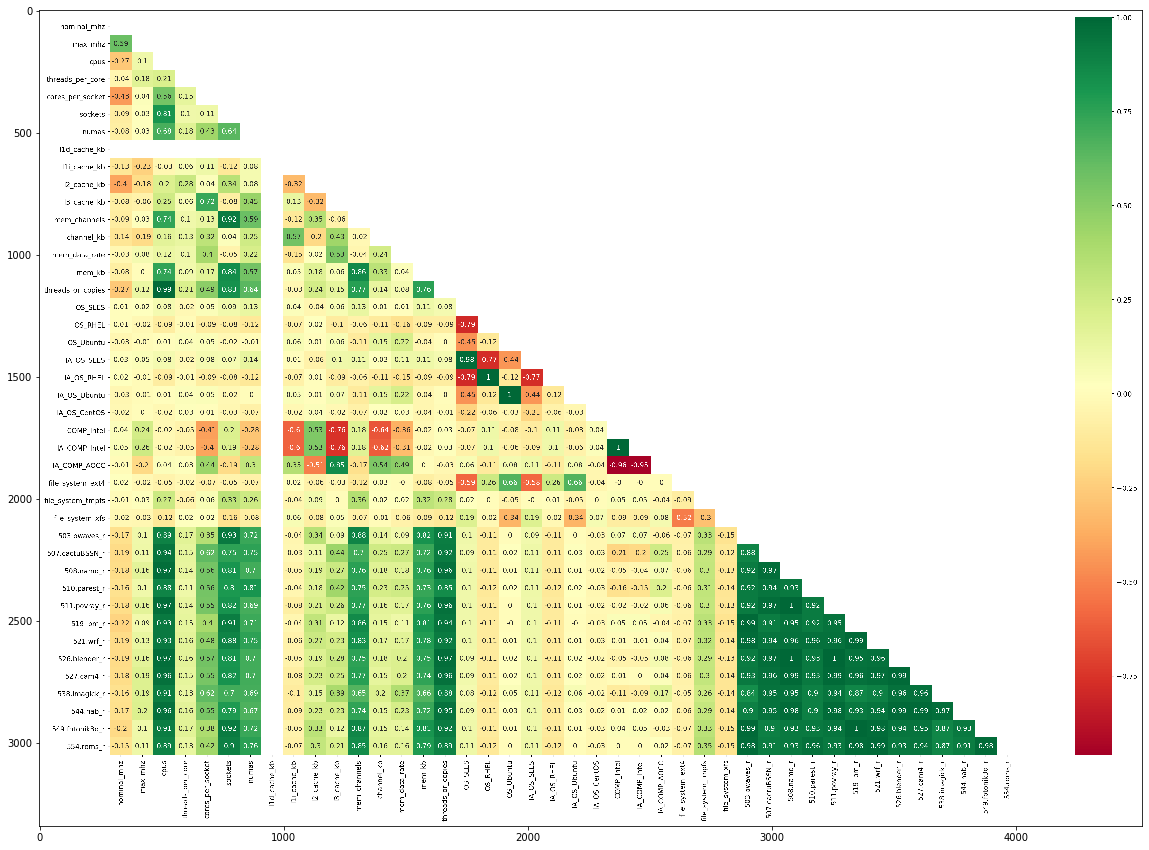

In [5]:
%reset -f
# restore the notebook session
import dill

dill.load_session("pickles/regress_01_heatmap.pkl")
warnings.simplefilter(action="default")

f, ax = plt.subplots(figsize=(20, 15))
plt.imshow(plt.imread("plots/explore/heatmap/FP_rate.png"), interpolation="none")


## 4.3 Transformation effect (None vs. log)

- In the paper, we we compare two Multiple Linear Regression (MLR) models using all 29 numerical features in predicting the Ratio outcome of benchmarks: one model without target transformation and one with log-transformation of the target (the feature set includes the transformed features, so it's all about y-transformation)

  - Here, we also consider `sqrt` transformation and generate density plots as well

train_X_df['FP_rate'].shape:  (4254, 29)
train_X_df['FP_speed'].shape:  (3439, 29)
train_X_df['Int_rate'].shape:  (4432, 29)
train_X_df['Int_speed'].shape:  (3444, 29)


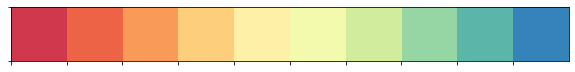

In [6]:
%reset -f
#####
# restore the notebook session
import dill
dill.load_session('pickles/regress_01_split.pkl')
warnings.simplefilter(action="default")

import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn import linear_model
from sklearn import metrics

from predict import model_regress

# sns.set_palette("Set3", color_codes=True)
# sns.palplot(sns.color_palette())
# violet = sns.color_palette()[2]
#red = "#D16103"
#green = "#00AFBB"
#yellow = "#FFDB6D"
#blue = "#56B4E9"
# sns_red = sns.color_palette()[3]
# orange = sns.color_palette()[5]
# purple = sns.color_palette()[9]
# sns_yellow = sns.color_palette()[1]
# sns_green = sns.color_palette()[0]
# # sns_light_green = sns.color_palette()[10]
# sns_blue = sns.color_palette()[4]
# grey = sns.color_palette()[8]

sns.set_palette("Spectral", 10, color_codes=True)
sns.palplot(sns.color_palette())
orange = sns.color_palette()[2]
yellow = sns.color_palette()[3]
#green = sns.color_palette()[8]
blue = sns.color_palette()[9]
# green = sns.color_palette()[8]
green = '#00bfc4'
red = sns.color_palette()[0]


# # reset sizes, etc
# sns.reset_orig

Y_TRANS = 'log'

# TODO: change this to be only the training data
## Note ##: showing all data including the Test set (if we have one)
for suite in suites:
    cat = suite['name']
    print("train_X_df['" + cat + "'].shape: ", train_X_df[cat].shape)
    for bench in suite['benchmarks']:
        ###################################
        # Density Charts
        ###################################
        # we look into the training set
        target = train_y_df[cat][bench]

        f, axes = plt.subplots(1, 2, figsize=(6,2))
        density_param = {'density': True}
        sns.distplot(target, color=red, kde_kws={"label": "KDE", 'linewidth':1}, 
                     hist=True, bins=100, rug=True,
                     label=bench, ax=axes[0])
        #axes[0].set_title(bench)
        axes[0].set_xlabel('Ratio (y)')
        axes[0].set_ylabel('Density')
        axes[0].legend(loc='upper right', frameon=True, fontsize=9)
        axes[0].grid(linestyle=':', linewidth=1)
        axes[0].spines['right'].set_visible(False)
        axes[0].spines['top'].set_visible(False)
        sns.distplot(np.log(target), color=green, kde_kws={"label": "KDE", 'linewidth':1}, 
                     hist=True, bins=100, rug=True,
                     label=bench, ax=axes[1])
        #axes[1].set_title(bench)
        axes[1].set_xlabel('log-Ratio (log-y)')
        axes[1].legend(loc='upper left', frameon=True, fontsize=9)
        axes[1].grid(linestyle=':', linewidth=1)
        axes[1].spines['right'].set_visible(False)
        axes[1].spines['top'].set_visible(False)
        #axes[1].tick_params(axis='both', which='major', labelsize=9)
        #plt.show()
        plt.savefig('plots/explore/density/'+cat+'_'+ bench+'.png', bbox_inches='tight', dpi=200)
        plt.close()

        

        ###################################
        # Input and Output cpus Transformation Charts
        ###################################
        chart_cpu = ['cpus', 'log_cpus']
        chart_mem = ['mem_kb', 'log_mem_kb']

        # we look into the training set
        # X transform
        trans_df = train_Xy_df[cat].copy()
        trans_df['log_cpus'] = np.log(trans_df['cpus'])
        trans_df['log_mem_kb'] = np.log(trans_df['mem_kb'])

        # y transform
        if Y_TRANS == 'log':
            trans_df['TRANS_'+bench] = np.log(trans_df[bench])
        elif Y_TRANS == 'sqrt':
            trans_df['TRANS_'+bench] = np.sqrt(trans_df[bench])
        elif Y_TRANS == 'none':
            trans_df['TRANS_'+bench] = trans_df[bench]



        # Ratio plot
        f, axes = plt.subplots(1, 2, figsize=(6, 2), sharey=True)
        for i,feat in enumerate(chart_cpu):
            legend =''
            ylabel = 'Ratio'
            if i == 0: 
                xlabel = 'cpus'
                dot_color = red
                legend = bench
            elif i == 1: 
                xlabel = "log(cpus)"
                dot_color = red  
            sns.scatterplot(ax= axes[i], x=trans_df[feat], y=trans_df[bench], color=dot_color, 
                                linewidths=0, edgecolor='w', label = legend)
            axes[i].set(xlabel=xlabel, ylabel=ylabel)
            axes[i].spines['right'].set_visible(False)
            axes[i].spines['top'].set_visible(False)
        #plt.show()
        plt.savefig('plots/explore/transforms/'+cat+'_'+bench+'_trans-'+str(i)+'.png', bbox_inches='tight', dpi=200)
        plt.close()

        # transformed Ratio plot 
        f, axes = plt.subplots(1, 2, figsize=(6, 2), sharey=True)
        for i,feat in enumerate(chart_cpu):
            legend =''
            ylabel = Y_TRANS + '(Ratio)'
            if i == 0: 
                xlabel = 'cpus'
                dot_color = red
            elif i == 1: 
                xlabel = "log(cpus)"
                dot_color = green
                legend = bench
            sns.scatterplot(ax= axes[i], x=trans_df[feat], y=trans_df['TRANS_'+bench], color=dot_color, 
                                linewidths=0, edgecolor='w', label = legend)
            axes[i].set_xlabel(xlabel=xlabel)
            #Tip: matplot label pad
            axes[i].set_ylabel(ylabel=ylabel, labelpad = 20)
            axes[i].spines['right'].set_visible(False)
            axes[i].spines['top'].set_visible(False)
            #Tip: matplot ticks pad
            #axes[i].tick_params(axis='y', which='major', pad=20)
        plt.savefig('plots/explore/transforms/'+cat+'_'+bench+'_trans-'+str(i+1)+'.png', bbox_inches='tight', dpi=200)
        #plt.show()
        plt.close()

        ###################################
        # Input and Output mem_kb Transformation Charts
        ###################################
        # Ratio plot
        f, axes = plt.subplots(1, 2, figsize=(6, 2), sharey=True)
        for i,feat in enumerate(chart_mem):
            legend =''
            ylabel = 'Ratio'
            if i == 0:
                xlabel = "mem_kb"
                dot_color = red
                legend = bench
            elif i == 1:
                xlabel = "log(mem_kb)"
                dot_color = red
            sns.scatterplot(ax= axes[i], x=trans_df[feat], y=trans_df[bench], color=dot_color, 
                                linewidths=0, edgecolor='w', label = legend)
            axes[i].set_xlabel(xlabel=xlabel)
            axes[i].set(xlabel=xlabel, ylabel=ylabel)
            axes[i].spines['right'].set_visible(False)
            axes[i].spines['top'].set_visible(False)
        #plt.show()
        plt.savefig('plots/explore/transforms/'+cat+'_'+bench+'_trans-'+str(i+2)+'.png', bbox_inches='tight', dpi=200)
        plt.close()

        # transformed Ratio plot
        f, axes = plt.subplots(1, 2, figsize=(6, 2), sharey=True)
        for i,feat in enumerate(chart_mem):
            legend =''
            ylabel = Y_TRANS + '(Ratio)'
            if i == 0: 
                xlabel = 'mem_kb'
                dot_color = red
            elif i == 1: 
                xlabel = "log(mem_kb)"
                dot_color = green
                legend = bench
            sns.scatterplot(ax= axes[i], x=trans_df[feat], y=trans_df['TRANS_'+bench], color=dot_color, 
                                linewidths=0, edgecolor='w', label = legend)
            axes[i].set_xlabel(xlabel=xlabel)
            axes[i].set_ylabel(ylabel=ylabel, labelpad = 20)
            axes[i].spines['right'].set_visible(False)
            axes[i].spines['top'].set_visible(False)
            #Tip: matplot ticks pad
            #axes[i].tick_params(axis='y', which='major', pad=20)
        #plt.show()
        plt.savefig('plots/explore/transforms/'+cat+'_'+bench+'_trans-'+str(i+3)+'.png', bbox_inches='tight', dpi=200)
        plt.close()

        # sns.pairplot(data=trans_df,
        #                 y_vars=[bench],
        #                 x_vars=chart_cpu)
        # plt.savefig('plots/explore/pairplot_' + cat + bench + '.png', bbox_inches='tight', dpi=200)

        # sns.pairplot(data=trans_df,
        #                 y_vars=['TRANS_'+bench],
        #                 x_vars=chart_cpu)
        # plt.savefig('plots/explore/pairplot_log_y_' + cat + bench + '.png', bbox_inches='tight', dpi=200)


        ###################################
        # Initial MLR Prediction Charts
        ###################################
        f, axes = plt.subplots(1, 2, figsize=(6,2), sharey=True)
        regrs = [data_transform.CustomTransformedTargetRegressor(
                    linear_model.LinearRegression(), trans_y='none'),
                 data_transform.CustomTransformedTargetRegressor(
                    linear_model.LinearRegression(), trans_y=Y_TRANS)
        ]
        
#       if bench == '505.mcf_r':  
        trans_train_df = train_Xy_df[cat].copy()
        trans_test_df = test_Xy_df[cat].copy()
        trans_train_df['cpus'] = np.log(trans_train_df['cpus'])
        trans_test_df['cpus'] = np.log(trans_test_df['cpus'])
        trans_train_df['mem_kb'] = np.log(trans_train_df['mem_kb'])
        trans_test_df['mem_kb'] = np.log(trans_test_df['mem_kb'])
        trans_train_df['threads_or_copies'] = np.log(trans_train_df['threads_or_copies'])
        trans_test_df['threads_or_copies'] = np.log(trans_test_df['threads_or_copies'])
          
        all_feats = list(train_X_df[cat])
        for i, regr in enumerate(regrs):
            # trans is X transformed
            regr.fit(trans_train_df[all_feats], trans_train_df[bench])
            y_pred = regr.predict(trans_test_df[all_feats])
            y_test = trans_test_df[bench].to_numpy()

#                 for ind,yp in enumerate(y_pred):
#                     if abs(yp-y_test[ind]) > 500:#*y_test[ind]:
#                         print(ind)
#                         display(test_Xy_df[cat].to_numpy()[ind])
#                         display(np.max(test_y_df[cat][bench]), test_y_df[cat][bench].idxmax(), 
#                                 y_pred[y_pred.argmax()])

            if i == 0: 
                title = 'MLR, no y transformation'
                dot_color = red
#             elif i == 1: 
#                 trans = "sqrt(Ratio)"
#                 dot_color = green
            elif i ==1:
                title = 'MLR, log-y transformation'
                dot_color = green
            #axes[i].scatter(y_test, y_pred, label= bench, color = dot_color, linewidths=0, edgecolor='w')
            sns.scatterplot(ax= axes[i], x=y_test, y=y_pred, color=dot_color, 
                                linewidths=0, edgecolor='w', label = bench)
            axes[i].plot(y_test, y_test, linestyle='dashed', color='grey')#, label='Identity line'
            axes[i].set_xlabel('Actual')
            if i==0:
                axes[i].set_ylabel('Predicted')
            axes[i].legend(loc='upper left', frameon=True)

            axes[i].set_title(title, fontsize=9)
            axes[i].text(1.7*np.max(y_test)/3, np.max(y_pred)/50, '$R^2$= %.2f\nMAE = %.2f\nMAPE = %.2f%%' % (
                metrics.r2_score(y_test, y_pred), metrics.mean_absolute_error(y_test, y_pred),
                                model_regress.single_mean_absolute_percentage_error(y_test, y_pred)), fontsize=9)
            axes[i].grid(linestyle=':', linewidth=1)
            axes[i].spines['right'].set_visible(False)
            axes[i].spines['top'].set_visible(False)
        #plt.show()
        plt.savefig('plots/explore/init_mlr/'+cat+'_'+bench+'.png', bbox_inches='tight', dpi=200)
        plt.close()
       


# 5. Preprocessing

## 5.1 Pipeline: feature transformation, reordering, standard scaling

- We log-transform the following inputs in the pipeline: `cpus`, `mem_kb`, `threads_or_copies` 
- We use a `ColumnReorder` step in the pipeline to reorder the columns transformed by the `ColumnTransformer` back to the original ordering
- We the measure the effect of transforming inputs on the non-/transformed output using Linear Regression 
  - **NOTE**: after transformation, use the transformed version of the input for the rest of analysis

In [8]:
%reset -f

#####
# restore the notebook session
import dill

dill.load_session("pickles/regress_01_split.pkl")
warnings.simplefilter(action="default")

from sklearn.compose import ColumnTransformer
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn import linear_model
from sklearn import set_config

from predict import data_transform
from predict import model_regress

VERBOSE = True
pd.set_option("display.max_columns", None)  # show all columns when display
pd.set_option("display.max_rows", None)

TRANS_FEATS = ["cpus", "mem_kb", "threads_or_copies"]
LR_MODELS = [
    data_transform.CustomTransformedTargetRegressor(
        regressor=linear_model.LinearRegression(), trans_y="none"
    ),
    data_transform.CustomTransformedTargetRegressor(
        regressor=linear_model.LinearRegression(), trans_y="log"
    ),
]

for suite in suites:
    cat = suite["name"]
    print(colored("\n***** " + cat + " *****", "magenta", attrs=["bold"]))

    if VERBOSE:
        print("Input train data before preprocessing")
        display(train_X_df[cat].head())

    #####
    # 1. all input output combinations
    # non-transformed input
    for lr in LR_MODELS:
        lr.fit(train_X_df[cat], train_y_df[cat])
        print(
            "Score on test data with inp_trans: none, out_trans:",
            lr.trans_y,
            " {:.4f}".format(lr.score(test_X_df[cat], test_y_df[cat])),
        )

    #####
    # preprocessing
    log_transform_X = ColumnTransformer(
        transformers=[
            ("log_trans_feat", preprocessing.FunctionTransformer(np.log), TRANS_FEATS),
        ],
        remainder="passthrough",  # passthrough the remaining columns, instead of drop
    )
    reorder_X = data_transform.ColumnReorder(list(train_X_df[cat]), TRANS_FEATS)

    pipe = Pipeline(
        steps=[
            ("transform_X", log_transform_X),
            ("reorder_X", reorder_X),
            ("debug1", data_transform.Debug(rows=5)),
            ("scale", preprocessing.StandardScaler()),
            ("debug2", data_transform.Debug()),
        ]
    )

    # transformed input
    for lr in LR_MODELS:
        pipe.steps.append(["lr", lr])
        pipe.fit(train_X_df[cat], train_y_df[cat])
        print(
            "Score on test data with inp_trans: log-std_scale, out_trans:",
            lr.trans_y,
            " {:.4f}".format(pipe.score(test_X_df[cat], test_y_df[cat])),
        )
        pipe.steps.pop(-1)

    #####
    # 2. pipeline then lr
    if VERBOSE:
        trans_train = pipe.fit_transform(train_X_df[cat])
        debug_X = pipe.named_steps["debug1"].X_head
        debug_X_df = pd.DataFrame(
            debug_X,
            index=train_X_df[cat].index[: debug_X.shape[0]],
            columns=train_X_df[cat].columns,
        )
        print("Transformed X from the debug1 step:")
        display(debug_X_df)

        debug_X = pipe.named_steps["debug2"].X_head
        debug_X_df = pd.DataFrame(
            debug_X,
            index=train_X_df[cat].index[: debug_X.shape[0]],
            columns=train_X_df[cat].columns,
        )
        print("Transformed X from the debug2 step:")
        display(debug_X_df)

        trans_test = pipe.transform(test_X_df[cat])
        lr.fit(trans_train, train_y_df[cat])
        print(
            "\nScore from lr in VERBOSE ",
            " {:.4f}".format(lr.score(trans_test, test_y_df[cat])),
            # " {:.4f}".format(lr.score(test_X_df[cat], test_y_df[cat])),
        )
    #####

    #####
    # 3. RegrModel using pipeline
    # use the final version to make a `RegrModel`
    pipe.steps.append(["lr", lr])
    lr_final = model_regress.RegrModel("log-log LR", pipe)
    lr_final.fit(train_X_df[cat], train_y_df[cat])
    lr_final.predict(test_X_df[cat], test_y_df[cat])
    print(lr_final)
    pipe.steps.pop(-1)

set_config(display="diagram")
display(pipe)

#####
# save the notebook session
dill.dump_session("pickles/regress_01_transform.pkl")




***** FP_rate *****
Input train data before preprocessing


,nominal_mhz,max_mhz,cpus,threads_per_core,cores_per_socket,sockets,numas,l1d_cache_kb,l1i_cache_kb,l2_cache_kb,l3_cache_kb,mem_channels,channel_kb,mem_data_rate,mem_kb,threads_or_copies,OS_SLES,OS_RHEL,OS_Ubuntu,IA_OS_SLES,IA_OS_RHEL,IA_OS_Ubuntu,IA_OS_CentOS,COMP_Intel,IA_COMP_Intel,IA_COMP_AOCC,file_system_ext4,file_system_tmpfs,file_system_xfs
3853,2200,3200.0,112.0,2.0,14.0,4.0,8.0,32,32,1024.0,19712.0,48.0,33554432.0,2666.0,1584975680,112,1,0,0,12.2,0.0,0.0,0.0,1,1800.0,0.0,0,0,1
514,2100,3700.0,88.0,2.0,22.0,2.0,4.0,32,32,1024.0,30976.0,24.0,33554432.0,2933.0,791211720,88,1,0,0,15.0,0.0,0.0,0.0,1,1904.0,0.0,0,0,1
62,2000,3700.0,104.0,2.0,26.0,2.0,4.0,32,32,1024.0,36608.0,12.0,33554432.0,2666.0,394174376,104,0,1,0,0.0,7.4,0.0,0.0,1,1800.0,0.0,0,0,1
4767,2100,3700.0,64.0,2.0,16.0,2.0,4.0,32,32,1024.0,22528.0,24.0,33554432.0,2666.0,791003300,64,1,0,0,12.2,0.0,0.0,0.0,1,1800.0,0.0,0,0,1
3694,2700,4000.0,104.0,2.0,26.0,2.0,4.0,32,32,1024.0,36608.0,24.0,33554432.0,2933.0,792178240,104,0,1,0,0.0,7.6,0.0,0.0,1,1901.0,0.0,0,0,1


Score on test data with inp_trans: none, out_trans: none  0.9562
Score on test data with inp_trans: none, out_trans: log  0.8343
Score on test data with inp_trans: log-std_scale, out_trans: none  0.9270
Score on test data with inp_trans: log-std_scale, out_trans: log  0.9824
Transformed X from the debug1 step:


,nominal_mhz,max_mhz,cpus,threads_per_core,cores_per_socket,sockets,numas,l1d_cache_kb,l1i_cache_kb,l2_cache_kb,l3_cache_kb,mem_channels,channel_kb,mem_data_rate,mem_kb,threads_or_copies,OS_SLES,OS_RHEL,OS_Ubuntu,IA_OS_SLES,IA_OS_RHEL,IA_OS_Ubuntu,IA_OS_CentOS,COMP_Intel,IA_COMP_Intel,IA_COMP_AOCC,file_system_ext4,file_system_tmpfs,file_system_xfs
3853,2200.0,3200.0,4.718499,2.0,14.0,4.0,8.0,32.0,32.0,1024.0,19712.0,48.0,33554432.0,2666.0,21.183835,4.718499,1.0,0.0,0.0,12.2,0.0,0.0,0.0,1.0,1800.0,0.0,0.0,0.0,1.0
514,2100.0,3700.0,4.477337,2.0,22.0,2.0,4.0,32.0,32.0,1024.0,30976.0,24.0,33554432.0,2933.0,20.489076,4.477337,1.0,0.0,0.0,15.0,0.0,0.0,0.0,1.0,1904.0,0.0,0.0,0.0,1.0
62,2000.0,3700.0,4.644391,2.0,26.0,2.0,4.0,32.0,32.0,1024.0,36608.0,12.0,33554432.0,2666.0,19.792304,4.644391,0.0,1.0,0.0,0.0,7.4,0.0,0.0,1.0,1800.0,0.0,0.0,0.0,1.0
4767,2100.0,3700.0,4.158883,2.0,16.0,2.0,4.0,32.0,32.0,1024.0,22528.0,24.0,33554432.0,2666.0,20.488813,4.158883,1.0,0.0,0.0,12.2,0.0,0.0,0.0,1.0,1800.0,0.0,0.0,0.0,1.0
3694,2700.0,4000.0,4.644391,2.0,26.0,2.0,4.0,32.0,32.0,1024.0,36608.0,24.0,33554432.0,2933.0,20.490297,4.644391,0.0,1.0,0.0,0.0,7.6,0.0,0.0,1.0,1901.0,0.0,0.0,0.0,1.0


Transformed X from the debug2 step:


,nominal_mhz,max_mhz,cpus,threads_per_core,cores_per_socket,sockets,numas,l1d_cache_kb,l1i_cache_kb,l2_cache_kb,l3_cache_kb,mem_channels,channel_kb,mem_data_rate,mem_kb,threads_or_copies,OS_SLES,OS_RHEL,OS_Ubuntu,IA_OS_SLES,IA_OS_RHEL,IA_OS_Ubuntu,IA_OS_CentOS,COMP_Intel,IA_COMP_Intel,IA_COMP_AOCC,file_system_ext4,file_system_tmpfs,file_system_xfs
3853,-0.648475,-0.804234,0.774982,0.301743,-0.243399,1.199837,1.004482,0.0,-0.194458,0.446438,-0.335396,1.433524,0.469914,-0.797054,1.522849,0.792793,0.579341,-0.455515,-0.260843,0.392011,-0.455251,-0.26078,-0.126443,0.321717,0.220177,-0.307644,-0.387752,-0.225587,0.74601
514,-0.830286,0.158078,0.518879,0.301743,0.562531,-0.243428,-0.177229,0.0,-0.194458,0.446438,-0.056647,0.083790,0.469914,0.821125,0.706235,0.534167,0.579341,-0.455515,-0.260843,0.870617,-0.455251,-0.26078,-0.126443,0.321717,0.411771,-0.307644,-0.387752,-0.225587,0.74601
62,-1.012097,0.158078,0.696283,0.301743,0.965495,-0.243428,-0.177229,0.0,-0.194458,0.446438,0.082727,-0.591077,0.469914,-0.797054,-0.112746,0.713318,-1.726100,2.195319,-0.260843,-1.693342,2.150453,-0.26078,-0.126443,0.321717,0.220177,-0.307644,-0.387752,-0.225587,0.74601
4767,-0.830286,0.158078,0.180697,0.301743,-0.041916,-0.243428,-0.177229,0.0,-0.194458,0.446438,-0.265709,0.083790,0.469914,-0.797054,0.705925,0.192652,0.579341,-0.455515,-0.260843,0.392011,-0.455251,-0.26078,-0.126443,0.321717,0.220177,-0.307644,-0.387752,-0.225587,0.74601
3694,0.260578,0.735465,0.696283,0.301743,0.965495,-0.243428,-0.177229,0.0,-0.194458,0.446438,0.082727,0.083790,0.469914,0.821125,0.707670,0.713318,-1.726100,2.195319,-0.260843,-1.693342,2.220878,-0.26078,-0.126443,0.321717,0.406244,-0.307644,-0.387752,-0.225587,0.74601



Score from lr in VERBOSE   0.9824
log-log LR
CustomTransformedTargetRegressor(regressor=LinearRegression(), trans_y='log')
avg r2: 0.9824, avg mae: 13.2518, avg mape: 6.57, median mape: 6.61, train time: 0.0440, mean_pred time: 0.0169
n_features: 29
Pipeline Steps: dict_keys(['transform_X', 'reorder_X', 'debug1', 'scale', 'debug2', 'lr'])
----------


***** FP_speed *****
Input train data before preprocessing


,nominal_mhz,max_mhz,cpus,threads_per_core,cores_per_socket,sockets,numas,l1d_cache_kb,l1i_cache_kb,l2_cache_kb,l3_cache_kb,mem_channels,channel_kb,mem_data_rate,mem_kb,threads_or_copies,OS_SLES,OS_RHEL,OS_Ubuntu,IA_OS_SLES,IA_OS_RHEL,IA_OS_CentOS,IA_OS_Ubuntu,COMP_Intel,IA_COMP_Intel,IA_COMP_AOCC,file_system_ext4,file_system_tmpfs,file_system_xfs
2608,2200,4000.0,96.0,2.0,24.0,2.0,4.0,32,32,1024.0,36608.0,12.0,33554432.0,2933.0,394821904,96,0,1,0,0.0,8.1,0.0,0.0,1,1911.0,0.0,0,1,0
4007,3800,4700.0,12.0,2.0,6.0,1.0,1.0,32,32,256.0,12288.0,4.0,16777216.0,2666.0,65807636,6,0,1,0,0.0,7.5,0.0,0.0,1,1802.0,0.0,0,0,1
3408,2700,4000.0,56.0,1.0,28.0,2.0,2.0,32,32,1024.0,39424.0,12.0,33554432.0,2933.0,395895376,56,1,0,0,15.0,0.0,0.0,0.0,1,1902.0,0.0,0,0,0
1591,2100,3700.0,48.0,1.0,24.0,2.0,2.0,32,32,1024.0,36608.0,12.0,16777216.0,2933.0,196234236,48,1,0,0,12.4,0.0,0.0,0.0,1,1901.0,0.0,0,0,0
1615,2000,3700.0,40.0,1.0,20.0,2.0,2.0,32,32,1024.0,28160.0,12.0,33554432.0,2666.0,395892676,40,1,0,0,12.2,0.0,0.0,0.0,1,1800.0,0.0,0,0,0


Score on test data with inp_trans: none, out_trans: none  0.8651
Score on test data with inp_trans: none, out_trans: log  0.7455
Score on test data with inp_trans: log-std_scale, out_trans: none  0.8981
Score on test data with inp_trans: log-std_scale, out_trans: log  0.9119
Transformed X from the debug1 step:


,nominal_mhz,max_mhz,cpus,threads_per_core,cores_per_socket,sockets,numas,l1d_cache_kb,l1i_cache_kb,l2_cache_kb,l3_cache_kb,mem_channels,channel_kb,mem_data_rate,mem_kb,threads_or_copies,OS_SLES,OS_RHEL,OS_Ubuntu,IA_OS_SLES,IA_OS_RHEL,IA_OS_CentOS,IA_OS_Ubuntu,COMP_Intel,IA_COMP_Intel,IA_COMP_AOCC,file_system_ext4,file_system_tmpfs,file_system_xfs
2608,2200.0,4000.0,4.564348,2.0,24.0,2.0,4.0,32.0,32.0,1024.0,36608.0,12.0,33554432.0,2933.0,19.793945,4.564348,0.0,1.0,0.0,0.0,8.1,0.0,0.0,1.0,1911.0,0.0,0.0,1.0,0.0
4007,3800.0,4700.0,2.484907,2.0,6.0,1.0,1.0,32.0,32.0,256.0,12288.0,4.0,16777216.0,2666.0,18.002246,1.791759,0.0,1.0,0.0,0.0,7.5,0.0,0.0,1.0,1802.0,0.0,0.0,0.0,1.0
3408,2700.0,4000.0,4.025352,1.0,28.0,2.0,2.0,32.0,32.0,1024.0,39424.0,12.0,33554432.0,2933.0,19.796661,4.025352,1.0,0.0,0.0,15.0,0.0,0.0,0.0,1.0,1902.0,0.0,0.0,0.0,0.0
1591,2100.0,3700.0,3.871201,1.0,24.0,2.0,2.0,32.0,32.0,1024.0,36608.0,12.0,16777216.0,2933.0,19.094820,3.871201,1.0,0.0,0.0,12.4,0.0,0.0,0.0,1.0,1901.0,0.0,0.0,0.0,0.0
1615,2000.0,3700.0,3.688879,1.0,20.0,2.0,2.0,32.0,32.0,1024.0,28160.0,12.0,33554432.0,2666.0,19.796654,3.688879,1.0,0.0,0.0,12.2,0.0,0.0,0.0,1.0,1800.0,0.0,0.0,0.0,0.0


Transformed X from the debug2 step:


,nominal_mhz,max_mhz,cpus,threads_per_core,cores_per_socket,sockets,numas,l1d_cache_kb,l1i_cache_kb,l2_cache_kb,l3_cache_kb,mem_channels,channel_kb,mem_data_rate,mem_kb,threads_or_copies,OS_SLES,OS_RHEL,OS_Ubuntu,IA_OS_SLES,IA_OS_RHEL,IA_OS_CentOS,IA_OS_Ubuntu,COMP_Intel,IA_COMP_Intel,IA_COMP_AOCC,file_system_ext4,file_system_tmpfs,file_system_xfs
2608,-0.692797,0.654101,1.224518,2.029177,0.760665,-0.245023,0.439818,0.0,-0.034125,0.422869,0.075411,-0.667653,0.731257,0.722132,-0.020558,1.345276,-1.379170,1.606951,-0.224493,-1.359250,1.777129,-0.13321,-0.224458,0.268964,0.379906,-0.266861,-0.342997,4.854306,-1.311765
4007,2.164273,2.021076,-1.095523,2.029177,-1.037773,-1.201472,-0.624347,0.0,-0.034125,-2.713537,-0.497761,-1.227890,-0.846405,-0.879125,-2.144318,-1.775980,-1.379170,1.606951,-0.224493,-1.359250,1.599419,-0.13321,-0.224458,0.268964,0.147324,-0.266861,-0.342997,-0.206003,0.762332
3408,0.200037,0.654101,0.623158,-0.492811,1.160318,-0.245023,-0.269626,0.0,-0.034125,0.422869,0.141779,-0.667653,0.731257,0.722132,-0.017340,0.738498,0.725074,-0.622296,-0.224493,0.965265,-0.621960,-0.13321,-0.224458,0.268964,0.360702,-0.266861,-0.342997,-0.206003,-1.311765
1591,-0.871364,0.068255,0.451171,-0.492811,0.760665,-0.245023,-0.269626,0.0,-0.034125,0.422869,0.075411,-0.667653,-0.846405,0.722132,-0.849255,0.564962,0.725074,-0.622296,-0.224493,0.562349,-0.621960,-0.13321,-0.224458,0.268964,0.358568,-0.266861,-0.342997,-0.206003,-1.311765
1615,-1.049931,0.068255,0.247754,-0.492811,0.361012,-0.245023,-0.269626,0.0,-0.034125,0.422869,-0.123691,-0.667653,0.731257,-0.879125,-0.017348,0.359712,0.725074,-0.622296,-0.224493,0.531356,-0.621960,-0.13321,-0.224458,0.268964,0.143056,-0.266861,-0.342997,-0.206003,-1.311765



Score from lr in VERBOSE   0.9119
log-log LR
CustomTransformedTargetRegressor(regressor=LinearRegression(), trans_y='log')
avg r2: 0.9119, avg mae: 10.5454, avg mape: 8.14, median mape: 7.54, train time: 0.0450, mean_pred time: 0.0081
n_features: 29
Pipeline Steps: dict_keys(['transform_X', 'reorder_X', 'debug1', 'scale', 'debug2', 'lr'])
----------


***** Int_rate *****
Input train data before preprocessing


,nominal_mhz,max_mhz,cpus,threads_per_core,cores_per_socket,sockets,numas,l1d_cache_kb,l1i_cache_kb,l2_cache_kb,l3_cache_kb,mem_channels,channel_kb,mem_data_rate,mem_kb,threads_or_copies,OS_SLES,OS_RHEL,OS_Ubuntu,IA_OS_SLES,IA_OS_RHEL,IA_OS_Ubuntu,IA_OS_CentOS,COMP_Intel,IA_COMP_Intel,IA_COMP_AOCC,file_system_ext4,file_system_tmpfs,file_system_xfs
2395,1800,3600.0,80.0,2.0,20.0,2.0,4.0,32,32,1024.0,28160.0,24.0,33554432.0,2933.0,792234908,80,1,0,0,15.0,0.0,0.00,0.0,1,1904.0,0.0,0,0,1
2567,2100,3700.0,176.0,2.0,22.0,4.0,8.0,32,32,1024.0,30976.0,48.0,16777216.0,2666.0,791092944,176,1,0,0,12.3,0.0,0.00,0.0,1,1802.0,0.0,0,0,1
5356,2100,4000.0,80.0,2.0,20.0,2.0,4.0,32,32,1024.0,28160.0,12.0,16777216.0,2933.0,197733644,80,1,0,0,15.1,0.0,0.00,0.0,1,1911.0,0.0,0,0,1
3698,2100,2700.0,64.0,2.0,16.0,2.0,8.0,32,64,512.0,32768.0,16.0,67108864.0,2666.0,1052392340,64,0,0,1,0.0,0.0,18.04,0.0,0,0.0,130.0,1,0,0
833,2000,3350.0,256.0,2.0,64.0,2.0,8.0,32,32,512.0,262144.0,16.0,67108864.0,3200.0,1056720360,256,0,0,1,0.0,0.0,19.04,0.0,0,0.0,200.0,1,0,0


Score on test data with inp_trans: none, out_trans: none  0.9673
Score on test data with inp_trans: none, out_trans: log  0.7451
Score on test data with inp_trans: log-std_scale, out_trans: none  0.9064
Score on test data with inp_trans: log-std_scale, out_trans: log  0.9910
Transformed X from the debug1 step:


,nominal_mhz,max_mhz,cpus,threads_per_core,cores_per_socket,sockets,numas,l1d_cache_kb,l1i_cache_kb,l2_cache_kb,l3_cache_kb,mem_channels,channel_kb,mem_data_rate,mem_kb,threads_or_copies,OS_SLES,OS_RHEL,OS_Ubuntu,IA_OS_SLES,IA_OS_RHEL,IA_OS_Ubuntu,IA_OS_CentOS,COMP_Intel,IA_COMP_Intel,IA_COMP_AOCC,file_system_ext4,file_system_tmpfs,file_system_xfs
2395,1800.0,3600.0,4.382027,2.0,20.0,2.0,4.0,32.0,32.0,1024.0,28160.0,24.0,33554432.0,2933.0,20.490369,4.382027,1.0,0.0,0.0,15.0,0.0,0.00,0.0,1.0,1904.0,0.0,0.0,0.0,1.0
2567,2100.0,3700.0,5.170484,2.0,22.0,4.0,8.0,32.0,32.0,1024.0,30976.0,48.0,16777216.0,2666.0,20.488926,5.170484,1.0,0.0,0.0,12.3,0.0,0.00,0.0,1.0,1802.0,0.0,0.0,0.0,1.0
5356,2100.0,4000.0,4.382027,2.0,20.0,2.0,4.0,32.0,32.0,1024.0,28160.0,12.0,16777216.0,2933.0,19.102431,4.382027,1.0,0.0,0.0,15.1,0.0,0.00,0.0,1.0,1911.0,0.0,0.0,0.0,1.0
3698,2100.0,2700.0,4.158883,2.0,16.0,2.0,8.0,32.0,64.0,512.0,32768.0,16.0,67108864.0,2666.0,20.774332,4.158883,0.0,0.0,1.0,0.0,0.0,18.04,0.0,0.0,0.0,130.0,1.0,0.0,0.0
833,2000.0,3350.0,5.545177,2.0,64.0,2.0,8.0,32.0,32.0,512.0,262144.0,16.0,67108864.0,3200.0,20.778436,5.545177,0.0,0.0,1.0,0.0,0.0,19.04,0.0,0.0,0.0,200.0,1.0,0.0,0.0


Transformed X from the debug2 step:


,nominal_mhz,max_mhz,cpus,threads_per_core,cores_per_socket,sockets,numas,l1d_cache_kb,l1i_cache_kb,l2_cache_kb,l3_cache_kb,mem_channels,channel_kb,mem_data_rate,mem_kb,threads_or_copies,OS_SLES,OS_RHEL,OS_Ubuntu,IA_OS_SLES,IA_OS_RHEL,IA_OS_Ubuntu,IA_OS_CentOS,COMP_Intel,IA_COMP_Intel,IA_COMP_AOCC,file_system_ext4,file_system_tmpfs,file_system_xfs
2395,-1.374634,-0.036034,0.387645,0.24964,0.366005,-0.254459,-0.191493,0.0,-0.189093,0.442026,-0.123750,0.068586,0.487081,0.820156,0.689466,0.387307,0.547107,-0.423869,-0.256205,0.844625,-0.423651,-0.256163,-0.129326,0.314970,0.404564,-0.301632,-0.386108,-0.264114,0.778330
2567,-0.826026,0.154654,1.222641,0.24964,0.570510,1.190466,0.983581,0.0,-0.189093,0.442026,-0.053284,1.407424,-0.854795,-0.797804,0.687783,1.222357,0.547107,-0.423869,-0.256205,0.370395,-0.423651,-0.256163,-0.129326,0.314970,0.213515,-0.301632,-0.386108,-0.264114,0.778330
5356,-0.826026,0.726716,0.387645,0.24964,0.366005,-0.254459,-0.191493,0.0,-0.189093,0.442026,-0.123750,-0.600833,-0.854795,0.820156,-0.930138,0.387307,0.547107,-0.423869,-0.256205,0.862189,-0.423651,-0.256163,-0.129326,0.314970,0.417675,-0.301632,-0.386108,-0.264114,0.778330
3698,-0.826026,-1.752221,0.151330,0.24964,-0.043005,-0.254459,0.983581,0.0,5.288414,-1.662226,-0.008442,-0.377694,3.170832,-0.797804,1.020827,0.150977,-1.827797,-0.423869,3.903131,-1.789986,-0.423651,3.876378,-0.129326,-3.174902,-3.161679,2.356091,2.589947,-0.264114,-1.284803
833,-1.008895,-0.512752,1.619450,0.24964,4.865119,-0.254459,0.983581,0.0,-0.189093,-1.662226,5.731288,-0.377694,3.170832,2.438115,1.025617,1.619193,-1.827797,-0.423869,3.903131,-1.789986,-0.423651,4.105454,-0.129326,-3.174902,-3.161679,3.787173,2.589947,-0.264114,-1.284803



Score from lr in VERBOSE   0.9910
log-log LR
CustomTransformedTargetRegressor(regressor=LinearRegression(), trans_y='log')
avg r2: 0.9910, avg mae: 9.8024, avg mape: 4.45, median mape: 4.51, train time: 0.0810, mean_pred time: 0.0177
n_features: 29
Pipeline Steps: dict_keys(['transform_X', 'reorder_X', 'debug1', 'scale', 'debug2', 'lr'])
----------


***** Int_speed *****
Input train data before preprocessing


,nominal_mhz,max_mhz,cpus,threads_per_core,cores_per_socket,sockets,numas,l1d_cache_kb,l1i_cache_kb,l2_cache_kb,l3_cache_kb,mem_channels,channel_kb,mem_data_rate,mem_kb,threads_or_copies,OS_SLES,OS_RHEL,OS_Ubuntu,IA_OS_CentOS,IA_OS_SLES,IA_OS_RHEL,IA_OS_Ubuntu,COMP_Intel,IA_COMP_Intel,IA_COMP_AOCC,file_system_ext4,file_system_tmpfs,file_system_xfs
1304,2000,3000.0,16.0,1.0,8.0,2.0,2.0,32,32,1024.0,11264.0,12.0,33554432.0,2666.0,395884172,16,1,0,0,0.0,12.2,0.0,0.0,1,1800.0,0.0,0,0,0
1125,2700,4000.0,104.0,2.0,26.0,2.0,2.0,32,32,1024.0,36608.0,24.0,16777216.0,2933.0,395869268,104,1,0,0,0.0,12.4,0.0,0.0,1,1901.0,0.0,0,0,0
1323,2700,3700.0,96.0,1.0,24.0,4.0,4.0,32,32,1024.0,33792.0,48.0,33554432.0,2666.0,1583346560,96,0,1,0,0.0,0.0,7.3,0.0,1,1800.0,0.0,0,0,1
3902,2600,3900.0,72.0,2.0,18.0,2.0,2.0,32,32,1024.0,25344.0,12.0,16777216.0,2933.0,197694664,72,1,0,0,0.0,12.4,0.0,0.0,1,1904.0,0.0,0,0,0
1934,2700,4000.0,52.0,1.0,26.0,2.0,2.0,32,32,1024.0,36608.0,24.0,16777216.0,2933.0,394426528,52,1,0,0,0.0,12.4,0.0,0.0,1,1901.0,0.0,0,0,1


Score on test data with inp_trans: none, out_trans: none  0.8939
Score on test data with inp_trans: none, out_trans: log  0.8915
Score on test data with inp_trans: log-std_scale, out_trans: none  0.9016
Score on test data with inp_trans: log-std_scale, out_trans: log  0.8974
Transformed X from the debug1 step:


,nominal_mhz,max_mhz,cpus,threads_per_core,cores_per_socket,sockets,numas,l1d_cache_kb,l1i_cache_kb,l2_cache_kb,l3_cache_kb,mem_channels,channel_kb,mem_data_rate,mem_kb,threads_or_copies,OS_SLES,OS_RHEL,OS_Ubuntu,IA_OS_CentOS,IA_OS_SLES,IA_OS_RHEL,IA_OS_Ubuntu,COMP_Intel,IA_COMP_Intel,IA_COMP_AOCC,file_system_ext4,file_system_tmpfs,file_system_xfs
1304,2000.0,3000.0,2.772589,1.0,8.0,2.0,2.0,32.0,32.0,1024.0,11264.0,12.0,33554432.0,2666.0,19.796632,2.772589,1.0,0.0,0.0,0.0,12.2,0.0,0.0,1.0,1800.0,0.0,0.0,0.0,0.0
1125,2700.0,4000.0,4.644391,2.0,26.0,2.0,2.0,32.0,32.0,1024.0,36608.0,24.0,16777216.0,2933.0,19.796595,4.644391,1.0,0.0,0.0,0.0,12.4,0.0,0.0,1.0,1901.0,0.0,0.0,0.0,0.0
1323,2700.0,3700.0,4.564348,1.0,24.0,4.0,4.0,32.0,32.0,1024.0,33792.0,48.0,33554432.0,2666.0,21.182807,4.564348,0.0,1.0,0.0,0.0,0.0,7.3,0.0,1.0,1800.0,0.0,0.0,0.0,1.0
3902,2600.0,3900.0,4.276666,2.0,18.0,2.0,2.0,32.0,32.0,1024.0,25344.0,12.0,16777216.0,2933.0,19.102234,4.276666,1.0,0.0,0.0,0.0,12.4,0.0,0.0,1.0,1904.0,0.0,0.0,0.0,0.0
1934,2700.0,4000.0,3.951244,1.0,26.0,2.0,2.0,32.0,32.0,1024.0,36608.0,24.0,16777216.0,2933.0,19.792943,3.951244,1.0,0.0,0.0,0.0,12.4,0.0,0.0,1.0,1901.0,0.0,0.0,0.0,1.0


Transformed X from the debug2 step:


,nominal_mhz,max_mhz,cpus,threads_per_core,cores_per_socket,sockets,numas,l1d_cache_kb,l1i_cache_kb,l2_cache_kb,l3_cache_kb,mem_channels,channel_kb,mem_data_rate,mem_kb,threads_or_copies,OS_SLES,OS_RHEL,OS_Ubuntu,IA_OS_CentOS,IA_OS_SLES,IA_OS_RHEL,IA_OS_Ubuntu,COMP_Intel,IA_COMP_Intel,IA_COMP_AOCC,file_system_ext4,file_system_tmpfs,file_system_xfs
1304,-1.044861,-1.278215,-0.831188,-0.644170,-0.831097,-0.238385,-0.283441,0.0,-0.03813,0.41654,-0.519577,-0.660086,0.717521,-0.871014,-0.018417,-0.820704,0.627509,-0.527633,-0.224322,-0.130794,0.432798,-0.527212,-0.22429,0.264381,0.137642,-0.2633,-0.340068,-0.175582,-1.288998
1125,0.194079,0.642035,1.243860,1.552386,1.001099,-0.238385,-0.283441,0.0,-0.03813,0.41654,0.089434,0.173376,-0.850463,0.739953,-0.018462,1.267989,0.627509,-0.527633,-0.224322,-0.130794,0.465571,-0.527212,-0.22429,0.264381,0.356400,-0.2633,-0.340068,-0.175582,-1.288998
1323,0.194079,0.065960,1.155126,-0.644170,0.797522,1.686579,0.440185,0.0,-0.03813,0.41654,0.021766,1.840300,0.717521,-0.871014,1.624731,1.178672,-1.593602,1.895257,-0.224322,-0.130794,-1.566301,1.819966,-0.22429,0.264381,0.137642,-0.2633,-0.340068,-0.175582,0.775797
3902,0.017088,0.450010,0.836207,1.552386,0.186790,-0.238385,-0.283441,0.0,-0.03813,0.41654,-0.181237,-0.660086,-0.850463,0.739953,-0.841545,0.857655,0.627509,-0.527633,-0.224322,-0.130794,0.465571,-0.527212,-0.22429,0.264381,0.362898,-0.2633,-0.340068,-0.175582,-1.288998
1934,0.194079,0.642035,0.475449,-0.644170,1.001099,-0.238385,-0.283441,0.0,-0.03813,0.41654,0.089434,0.173376,-0.850463,0.739953,-0.022790,0.494525,0.627509,-0.527633,-0.224322,-0.130794,0.465571,-0.527212,-0.22429,0.264381,0.356400,-0.2633,-0.340068,-0.175582,0.775797



Score from lr in VERBOSE   0.8974
log-log LR
CustomTransformedTargetRegressor(regressor=LinearRegression(), trans_y='log')
avg r2: 0.8974, avg mae: 0.4006, avg mape: 3.89, median mape: 3.70, train time: 0.0240, mean_pred time: 0.0067
n_features: 29
Pipeline Steps: dict_keys(['transform_X', 'reorder_X', 'debug1', 'scale', 'debug2', 'lr'])
----------



Pipeline(steps=[('transform_X',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('log_trans_feat',
                                                  FunctionTransformer(func=<ufunc 'log'>),
                                                  ['cpus', 'mem_kb',
                                                   'threads_or_copies'])])),
                ('reorder_X',
                 ColumnReorder(initial_features=['nominal_mhz', 'max_mhz',
                                                 'cpus', 'threads_per_core',
                                                 'cores_per_socket', 'sockets',
                                                 'numas', 'l1d_cache_kb',
                                                 'l1i_cache_kb', 'l...
                                                 'channel_kb', 'mem_data_rate',
                                                 'mem_kb', 'threads_or_copies',
                                                 'OS_SLES', 'OS_RHEL',
                                                 'OS_Ubuntu', 'IA_OS_CentOS',
                                                 'IA_OS_SLES', 'IA_OS_RHEL',
                                                 'IA_OS_Ubuntu', 'COMP_Intel',
                                                 'IA_COMP_Intel',
                                                 'IA_COMP_AOCC',
                                                 'file_system_ext4',
                                                 'file_system_tmpfs',
                                                 'file_system_xfs'],
                               trans_features=['cpus', 'mem_kb',
                                               'threads_or_copies'])),
                ('debug1', Debug()), ('scale', StandardScaler()),
                ('debug2', Debug())])